# Изучение закономерностей, определяющих успешность игр

### Описание проекта: 
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


### Цель проекта:
Используя исторические данные о продажах компьютерных игр, оценки пользователей и экспертов, жанры и платформы, выявить закономерности, определяющие успешность игры. Определить актуальный период за который можно будет просматривать продажи, составить портрет пользователей для каждого региона.


### Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

In [2]:
data = pd.read_csv('C:/Users/dima/Downloads/games.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
display(data.head(20))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


У нас дан датафрейм, состоящий из 11 столбцов с информацией о играх, дате их выпуска и продажах в каждом регионе. Нам нужно будет привести все названия столбцов привести к одному региструб заполнить пропущенные значения, изменить тип данныхб проверить на дубликаты.

### Шаг 2. Подготовьте данные

#### Замените названия столбцов (приведите к нижнему регистру)

In [5]:
data = data.rename(columns = {'Name': 'name', 'Platform': 'platform', 'Year_of_Release': 'year_of_release','Genre':'genre','NA_sales':'na_sales','EU_sales':'eu_sales','JP_sales':'jp_sales','Other_sales':'other_sales','Critic_Score':'critic_score','User_Score':'user_score', 'Rating':'rating'})

In [6]:
list(data)

['name',
 'platform',
 'year_of_release',
 'genre',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'critic_score',
 'user_score',
 'rating']

#### Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему

Перед тем как менять типы данных, нужно в некоторых столбцах заполнить пропуски.

#### Обработайте пропуски при необходимости

Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
Опишите причины, которые могли привести к пропускам;
Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;

In [7]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
#TBD, to be determined = будет определено, тоесть рейтинг не определен, рассмотрим, сколько у нас рейтинга с таким названием
data['user_score'] = data['user_score'].fillna(0) # заменим пропущенные значения в столбце user_score на 0
data.loc[data['user_score'] == 'tbd', 'user_score'] = 0
data.query('user_score == "tbd"')
data['user_score'] = data['user_score'].astype('float')
data.info() # тип данных изменился на float64
data['user_score'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       16715 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


array([8. , 0. , 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 1.6,
       9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2, 0.6,
       1.4, 0.9, 1. , 9.7])

Пропущенные значения в столбце rating на что-то подходящее заменить не получится, поэтому можно оставить без изменения. Пропуски столбца critic_score можно оставить без изменения, т.к. при замене на 0 будет сильно искажено значение медианы. Возможно лучше оставить без изменения.

Найдем пропуски в столбце name и заодно видим, что в этих же строках есть пропуски и в столбце genre. Удалим данные столбцы.

In [9]:
display(data[data['name'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,0.0,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,0.0,NaN


In [10]:
data = data.drop([659,14244]).reset_index(drop=True)#удалим пропущенные значения в стоблцах name и genre

data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score            0
rating             6764
dtype: int64

In [11]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [12]:
display(data[data['year_of_release'].isna()]) #пропуски в данном столбце есть у одинаковых названий игр, но с разныи платформами, тем самым можно дозаполнить значения года 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,0.0,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,0.0,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,0.0,NaN


In [13]:
display(data.query('name == "LEGO Harry Potter: Years 5-7"')) # сделаем срез данных по игре и видим, что в этой игре есть значение года для одной платформы, но игра одна и так же, следовательно год будет тот же 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1608,LEGO Harry Potter: Years 5-7,Wii,NaN,Action,0.69,0.42,0.0,0.12,76.0,7.8,E10+
2131,LEGO Harry Potter: Years 5-7,X360,NaN,Action,0.51,0.37,0.0,0.09,77.0,7.9,E10+
2272,LEGO Harry Potter: Years 5-7,PS3,NaN,Action,0.36,0.41,0.0,0.15,76.0,8.3,E10+
3080,LEGO Harry Potter: Years 5-7,DS,NaN,Action,0.34,0.25,0.0,0.07,69.0,0.0,E10+
4817,LEGO Harry Potter: Years 5-7,3DS,NaN,Action,0.18,0.19,0.0,0.03,71.0,6.5,E10+
6475,LEGO Harry Potter: Years 5-7,PSP,NaN,Action,0.10,0.10,0.0,0.06,NaN,0.0,E10+
7209,LEGO Harry Potter: Years 5-7,PC,NaN,Action,0.05,0.14,0.0,0.03,80.0,8.5,E10+
8058,LEGO Harry Potter: Years 5-7,PSV,2012.0,Action,0.07,0.07,0.0,0.03,64.0,6.8,E10+


In [14]:
data['year_of_release'] = data.groupby('name')['year_of_release'].fillna(method='bfill')
data['year_of_release'] = data.groupby('name')['year_of_release'].fillna(method='ffill')

In [15]:
display(data.query('name == "LEGO Harry Potter: Years 5-7"')) #значения заменились на всех платформах

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1608,LEGO Harry Potter: Years 5-7,Wii,2012.0,Action,0.69,0.42,0.0,0.12,76.0,7.8,E10+
2131,LEGO Harry Potter: Years 5-7,X360,2012.0,Action,0.51,0.37,0.0,0.09,77.0,7.9,E10+
2272,LEGO Harry Potter: Years 5-7,PS3,2012.0,Action,0.36,0.41,0.0,0.15,76.0,8.3,E10+
3080,LEGO Harry Potter: Years 5-7,DS,2012.0,Action,0.34,0.25,0.0,0.07,69.0,0.0,E10+
4817,LEGO Harry Potter: Years 5-7,3DS,2012.0,Action,0.18,0.19,0.0,0.03,71.0,6.5,E10+
6475,LEGO Harry Potter: Years 5-7,PSP,2012.0,Action,0.10,0.10,0.0,0.06,NaN,0.0,E10+
7209,LEGO Harry Potter: Years 5-7,PC,2012.0,Action,0.05,0.14,0.0,0.03,80.0,8.5,E10+
8058,LEGO Harry Potter: Years 5-7,PSV,2012.0,Action,0.07,0.07,0.0,0.03,64.0,6.8,E10+


In [16]:
display(data[data['year_of_release'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,0.0,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,0.0,E
804,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T
1141,Rock Band,PS3,NaN,Misc,0.99,0.41,0.00,0.22,92.0,8.4,T
...,...,...,...,...,...,...,...,...,...,...,...
16275,Homeworld Remastered Collection,PC,NaN,Strategy,0.00,0.01,0.00,0.00,86.0,8.2,E10+
16286,Shorts,DS,NaN,Platform,0.01,0.00,0.00,0.00,NaN,0.0,E10+
16346,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,0.0,NaN
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,0.0,NaN


In [17]:
display(data.query('name == "Haven: Call of the King"'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
6100,Haven: Call of the King,PS2,NaN,Platform,0.14,0.11,0.0,0.04,69.0,6.9,T


In [18]:
#заменим некоторые значения вручную, найдя информацию в интернете
data.loc[data['name'] == 'Rock Band', 'year_of_release'] = 2007
data.loc[data['name'] == 'Adventure', 'year_of_release'] = 1979
data.loc[data['name'] == 'WarioWare: Twisted!', 'year_of_release'] = 2004
data.loc[data['name'] == 'Monster Hunter 2', 'year_of_release'] = 2006
data.loc[data['name'] == 'Advance Wars: Days of Ruin', 'year_of_release'] = 2008
data.loc[data['name'] == 'TERA', 'year_of_release'] = 2011
data.loc[data['name'] == 'Silent Hill: Homecoming', 'year_of_release'] = 2008
data.loc[data['name'] == 'Combat', 'year_of_release'] = 1977
data.loc[data['name'] == 'Test Drive Unlimited 2', 'year_of_release'] = 2011
data.loc[data['name'] == 'Legacy of Kain: Soul Reaver', 'year_of_release'] = 1999
data.loc[data['name'] == 'Donkey Kong Land III', 'year_of_release'] = 1997
data.loc[data['name'] == 'Air-Sea Battle', 'year_of_release'] = 1977
data.loc[data['name'] == 'Suikoden III', 'year_of_release'] = 2002
data.loc[data['name'] == 'Yakuza 4', 'year_of_release'] = 2010
data.loc[data['name'] == 'Super Breakout', 'year_of_release'] = 1978
data.loc[data['name'] == 'Harvest Moon: Save the Homeland', 'year_of_release'] = 2001
data.loc[data['name'] == 'Fishing Derby', 'year_of_release'] = 1980
data.loc[data['name'] == 'Karate', 'year_of_release'] = 2016
data.loc[data['name'] == 'Circus Atari', 'year_of_release'] = 1980
data.loc[data['name'] == 'NHL Slapshot', 'year_of_release'] = 2010
data.loc[data['name'] == 'Hangman', 'year_of_release'] = 1978
data.loc[data['name'] == 'Dragon Ball Z: Budokai Tenkaichi 2 (JP sales)', 'year_of_release'] = 2006
data.loc[data['name'] == 'Dragste', 'year_of_release'] = 1980
data.loc[data['name'] == 'Slot Machine', 'year_of_release'] = 1979
data.loc[data['name'] == 'The Dukes of Hazzard II: Daisy Dukes It Out', 'year_of_release'] = 2000
data.loc[data['name'] == 'Haven: Call of the King', 'year_of_release'] = 2002 


In [19]:
data.isna().sum() #осталось 115 пропусков, остальные значения можно удалить, из доля очень мала, от общего количества значений

name                  0
platform              0
year_of_release     115
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score            0
rating             6764
dtype: int64

In [20]:
data = data.dropna(subset=['year_of_release']).reset_index(drop=True) #удалим оставшиеся пропущенные значения

In [21]:
data['year_of_release'] = data['year_of_release'].astype('int') #заменим тип данных на int, год является целым числом

In [22]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8505
user_score            0
rating             6712
dtype: int64

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16598 non-null  object 
 1   platform         16598 non-null  object 
 2   year_of_release  16598 non-null  int32  
 3   genre            16598 non-null  object 
 4   na_sales         16598 non-null  float64
 5   eu_sales         16598 non-null  float64
 6   jp_sales         16598 non-null  float64
 7   other_sales      16598 non-null  float64
 8   critic_score     8093 non-null   float64
 9   user_score       16598 non-null  float64
 10  rating           9886 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


In [24]:
#поиск строк-дубликатов
data.duplicated().sum()

0

In [25]:
data['name'].value_counts().head(40) #посмотри столбец name в нем

name
Need for Speed: Most Wanted                    12
LEGO Marvel Super Heroes                        9
FIFA 14                                         9
Madden NFL 07                                   9
Ratatouille                                     9
Lego Batman 3: Beyond Gotham                    8
LEGO Jurassic World                             8
LEGO Harry Potter: Years 5-7                    8
Terraria                                        8
Madden NFL 08                                   8
FIFA Soccer 13                                  8
The LEGO Movie Videogame                        8
FIFA 15                                         8
LEGO The Hobbit                                 8
Monopoly                                        8
Cars                                            8
Angry Birds Star Wars                           8
LEGO Star Wars II: The Original Trilogy         8
Harry Potter and the Sorcerer's Stone           7
LEGO Star Wars III: The Clone Wars           

In [26]:
data[data['name'] == 'Madden NFL 07']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
241,Madden NFL 07,PS2,2006,Sports,3.63,0.24,0.01,0.61,84.0,8.2,E
969,Madden NFL 07,X360,2006,Sports,1.66,0.00,0.01,0.13,80.0,6.0,E
2031,Madden NFL 07,XB,2006,Sports,0.97,0.03,0.00,0.03,83.0,8.7,E
2475,Madden NFL 07,PSP,2006,Sports,0.77,0.03,0.00,0.04,78.0,6.6,E
3225,Madden NFL 07,GC,2006,Sports,0.48,0.13,0.00,0.02,82.0,9.2,E
3834,Madden NFL 07,PS3,2006,Sports,0.47,0.00,0.01,0.04,76.0,4.2,E
4002,Madden NFL 07,Wii,2006,Sports,0.46,0.00,0.00,0.04,81.0,8.0,E
7349,Madden NFL 07,DS,2006,Sports,0.20,0.00,0.00,0.02,70.0,6.5,E
14794,Madden NFL 07,GBA,2006,Sports,0.02,0.01,0.00,0.00,68.0,9.3,E


In [27]:
data[data['name'] == 'Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
522,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,NaN,0.0,NaN
1187,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1587,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1994,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2044,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,NaN,0.0,NaN
3577,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5960,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6258,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,NaN,0.0,NaN
6393,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Эта игра вышла в 2005 и 2012 году под одним названием, а дубликаты показывает так как есть эта игра на разных платормах, но остальные значения разные. Так же дела обстоят с другими названиями игр, они вышли для нескольких платформ, поэтому показывается как дубликат.

In [28]:
#посмотрим дубликаты в столбце platform
data['platform'].unique() 

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

По названию нет неявных дубликатов

In [29]:
data['platform'].value_counts()

platform
PS2     2145
DS      2130
PS3     1324
Wii     1304
X360    1253
PSP     1203
PS      1192
PC       972
XB       817
GBA      814
GC       552
3DS      515
PSV      429
PS4      392
N64      318
XOne     247
SNES     239
SAT      173
WiiU     147
2600     126
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

In [30]:
data[data['platform'] == 'TG16']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
9182,Doukyuusei,TG16,1995,Adventure,0.0,0.0,0.14,0.0,NaN,0.0,NaN
15528,Ginga Fukei Densetsu: Sapphire,TG16,1995,Shooter,0.0,0.0,0.02,0.0,NaN,0.0,NaN


По платформам тоже не видно неявных дубликатов.

In [31]:
data['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983, 1979, 1977, 1978])

In [32]:
data['year_of_release'].value_counts().sum()

16598

Не обнаружено неявных дубликатов в столбцах.

In [33]:
#Код ревьюера
data[data[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
603,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
1741,Sonic the Hedgehog,PS3,2006,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4123,Sonic the Hedgehog,PS3,2006,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
16118,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


#### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец

In [34]:
data['sum_sales'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

In [35]:
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,0.0,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,0.0,NaN,31.38


В данном разделе изменили тип данных в столбце year_of_release датафрейма на int64, user_score на float64. Нашли пропуски в столбцах датафрейма, заменили пропуски, там где это возможно. Проверили на строки-дубликаты, ничего не нашлось. Добавили столбец в котором посчитана общее количество проданных копий.

### Шаг 3. Проведите исследовательский анализ данных

#### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [36]:
sum_year = data.copy()
sum_year = sum_year.pivot_table(index='year_of_release', values = 'name', aggfunc='count')
sum_year = sum_year.reset_index()
display(sum_year)

,year_of_release,name
0,1977,2
1,1978,2
2,1979,2
3,1980,11
4,1981,46
5,1982,36
6,1983,17
7,1984,14
8,1985,14
9,1986,21


In [37]:
sum_year.describe()

,year_of_release,name
count,40.000000,40.000000
mean,1996.500000,414.950000
std,11.690452,454.590881
min,1977.000000,2.000000
25%,1986.750000,17.000000
50%,1996.500000,276.500000
75%,2006.250000,687.750000
max,2016.000000,1443.000000


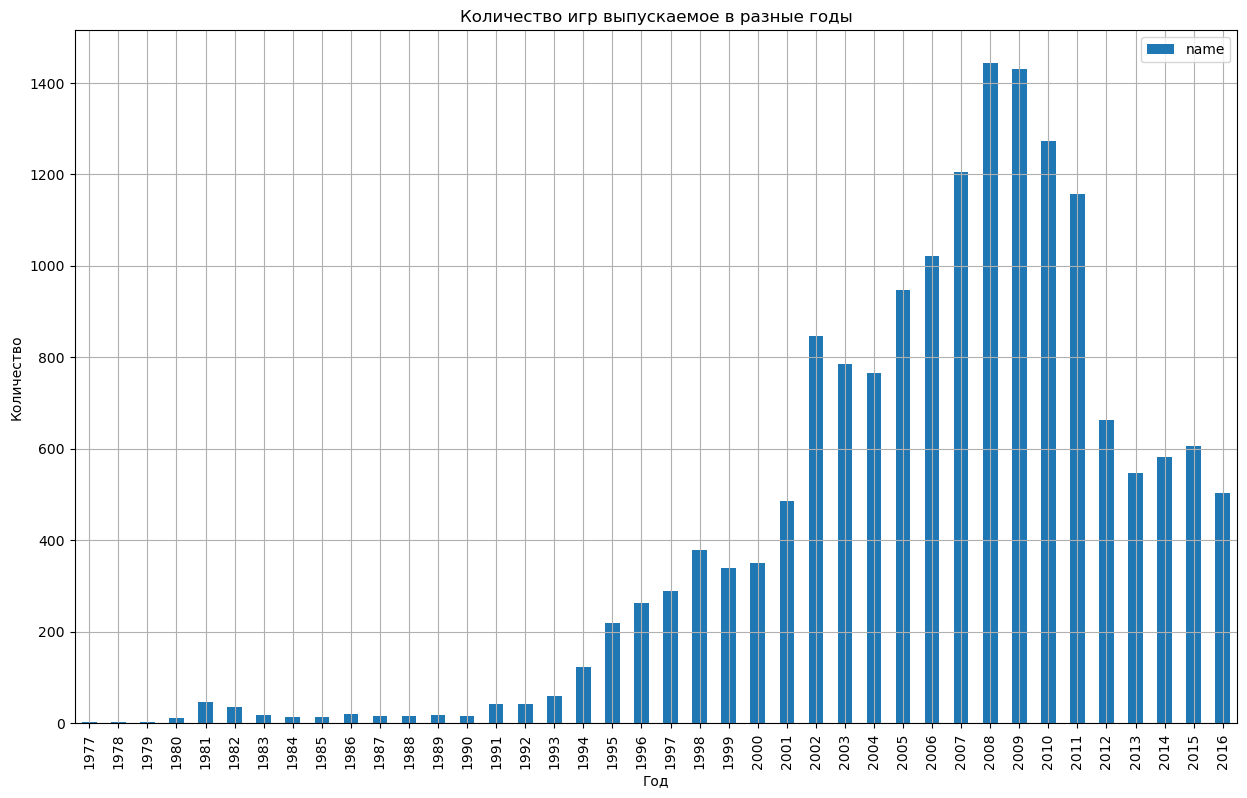

In [38]:
sum_year.plot(x='year_of_release', kind='bar', figsize=(15, 9), grid=True, title ='Количество игр выпускаемое в разные годы')
plt.xlabel('Год')
plt.ylabel('Количество');

    До 1993 года количество игр, которые выпускалось, было очень мало. После 1993 года их значение начало очень хороший рост, пока не достигло пиков в 2008, 2009 годах(чуть больше 1400 игр за каждый год). По 2010 и 2011 годам так же были хорошие показатели, после чего количество игр заметно снизилось, практически больше чем в половину от пиковых значений и держится на значении около 600. 
     Скорее всего этот показатель снизился не просто так, а по причине усложнения игр(физики, графики и т.д.), поэтому на разработку новой игры нужно все больше времени, технологий, ресурсов. Да и сам пользователь стал более требовательным.

#### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [39]:
#нам необходимо посмотреть платформы с наибольшими суммарными продажами
platform= data.copy()
platform=platform.pivot_table(index='platform', values='sum_sales', aggfunc='sum')
platform = platform.reset_index()
platform.columns = ['platform', 'sum_sales_pf']
platform = platform.sort_values(by='sum_sales_pf',ascending=True).reset_index(drop=True).loc[25:30] #возьмем топ 6 продаж по платформам

#platform.info()
display(platform)


,platform,sum_sales_pf
25,PS,728.93
26,DS,804.88
27,Wii,906.16
28,PS3,938.78
29,X360,970.20
30,PS2,1250.57


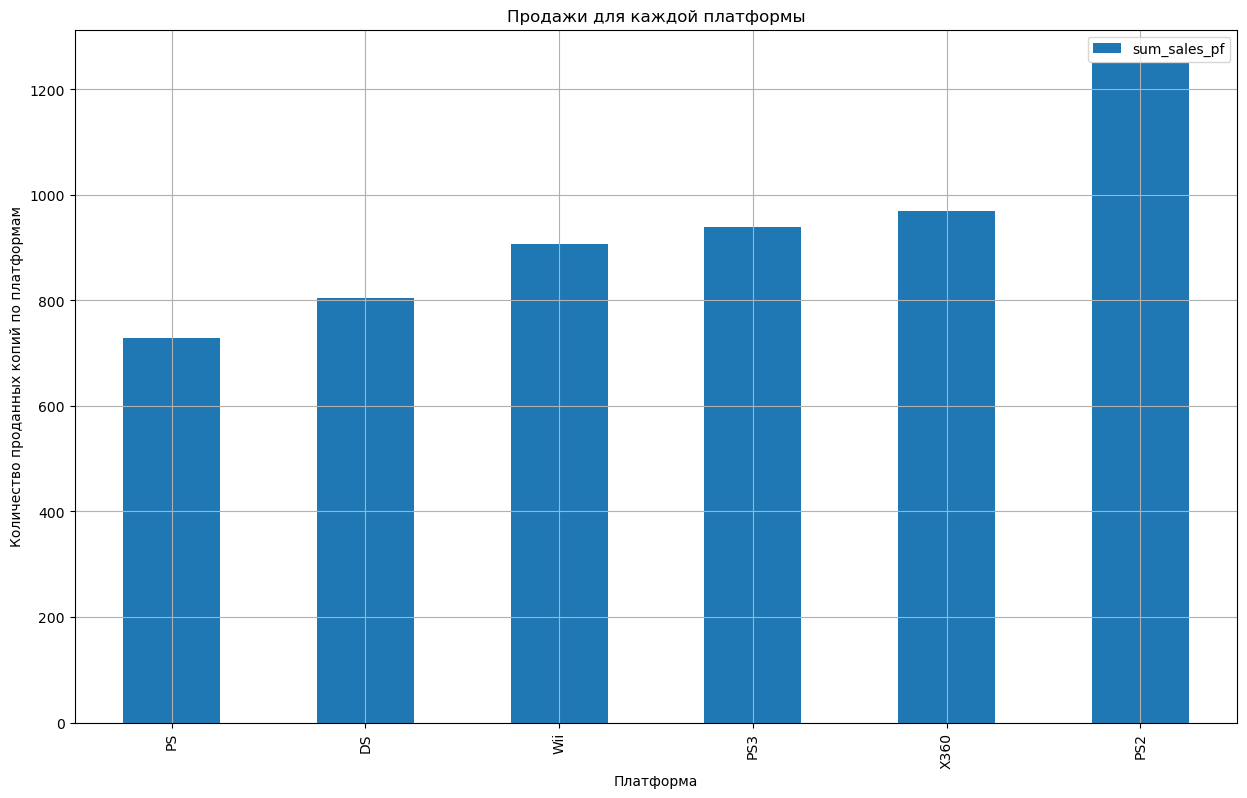

In [40]:
platform.plot(x='platform', y='sum_sales_pf', kind='bar', figsize=(15, 9), grid=True, title ='Продажи для каждой платформы')
plt.xlabel('Платформа')
plt.ylabel('Количество проданных копий по платформам');

Больше всего проданных копий игр у PS2. Количество копий значительно отличается от остальных. Платформы X360, PS3, Wii по проданным копиям практически не отличаются между собой. Меньше остальных продаж у Ds и PS.

Построим распределение для каждой платформы по годам. 

In [41]:
#по PS
ps =data.query('platform == "PS"').pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum')
ps = ps.reset_index()
display(ps)

,year_of_release,sum_sales
0,1994,6.03
1,1995,35.96
2,1996,94.70
3,1997,136.17
4,1998,169.49
5,1999,145.58
6,2000,96.67
7,2001,35.59
8,2002,6.67
9,2003,2.07


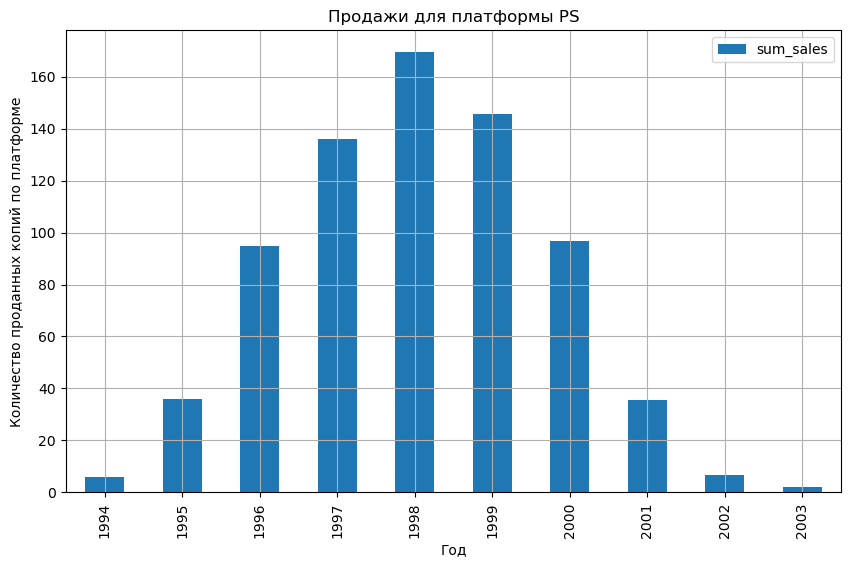

In [42]:
ps.plot(x='year_of_release', y='sum_sales', kind='bar', figsize=(10, 6), grid=True, title ='Продажи для платформы PS')
plt.xlabel('Год')
plt.ylabel('Количество проданных копий по платформе');

Большинство продаж было с 1997 по 1999 год. После чего выручка пошла на спад в 2003 году выручка была меньше всех за данный период. Судя по данным, игры по платформе PS приносили выручку 10 лет.

In [43]:
#по DS
ds =data.query('platform == "DS"').pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum')
ds = ds.reset_index()
display(ds)

,year_of_release,sum_sales
0,1985,0.02
1,2004,17.27
2,2005,130.14
3,2006,119.81
4,2007,147.23
5,2008,145.96
6,2009,119.56
7,2010,85.35
8,2011,26.33
9,2012,11.67


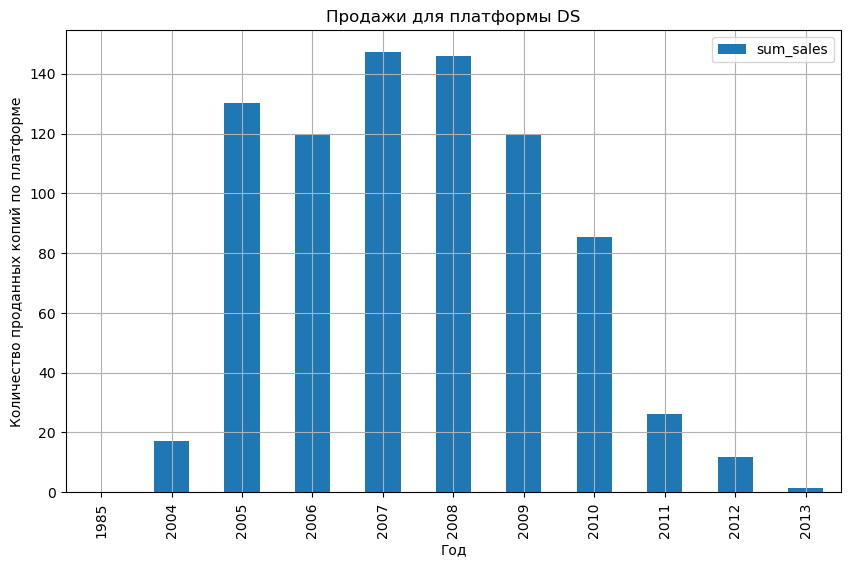

In [44]:
ds.plot(x='year_of_release', y='sum_sales', kind='bar', figsize=(10, 6), grid=True, title ='Продажи для платформы DS')
plt.xlabel('Год')
plt.ylabel('Количество проданных копий по платформе');

Появились данные за 1985 год, хотя платформа вышла в 2004 году. Нужно определить, что это за данные, сделаем срез по условию.

In [45]:
display(data.loc[(data['year_of_release'] == 1985) &(data['platform'] == 'DS')]) 


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
15849,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,0.0,NaN,0.02


In [46]:
#дата релиза данной игры 2010 году, поправим эти данные
data.loc[15955, 'year_of_release'] = 2010
display(data.query('name == "Strongest Tokyo University Shogi DS"')) # теперь можем строить график

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
15849,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,0.0,NaN,0.02


In [47]:
#по DS
ds =data.query('platform == "DS"').pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum')
ds = ds.reset_index()
display(ds)

,year_of_release,sum_sales
0,1985,0.02
1,2004,17.27
2,2005,130.14
3,2006,119.81
4,2007,147.23
5,2008,145.96
6,2009,119.56
7,2010,85.35
8,2011,26.33
9,2012,11.67


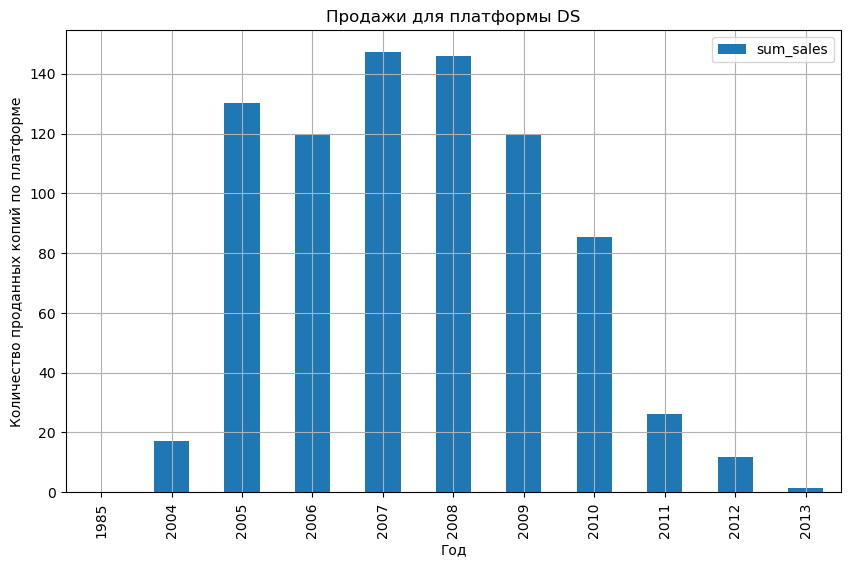

In [48]:
ds.plot(x='year_of_release', y='sum_sales', kind='bar', figsize=(10, 6), grid=True, title ='Продажи для платформы DS')
plt.xlabel('Год')
plt.ylabel('Количество проданных копий по платформе');

Платформа вышла в конца 2004 года и, как видно по графику, еще не успела показать рост, но зато уже в 2005 году проданных копий на данную платформу 120 миллионов копий. И плюс-минус такое значение продержалось до 2009 года, после чего наблюдается значительный спад и к 2013 году количество копий стремится к 0.

In [49]:
#по Wii
wii =data.query('platform == "Wii"').pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum')
wii = wii.reset_index()
display(wii)

,year_of_release,sum_sales
0,2006,140.54
1,2007,155.50
2,2008,177.68
3,2009,206.97
4,2010,129.08
5,2011,59.79
6,2012,22.94
7,2013,8.59
8,2014,3.75
9,2015,1.14


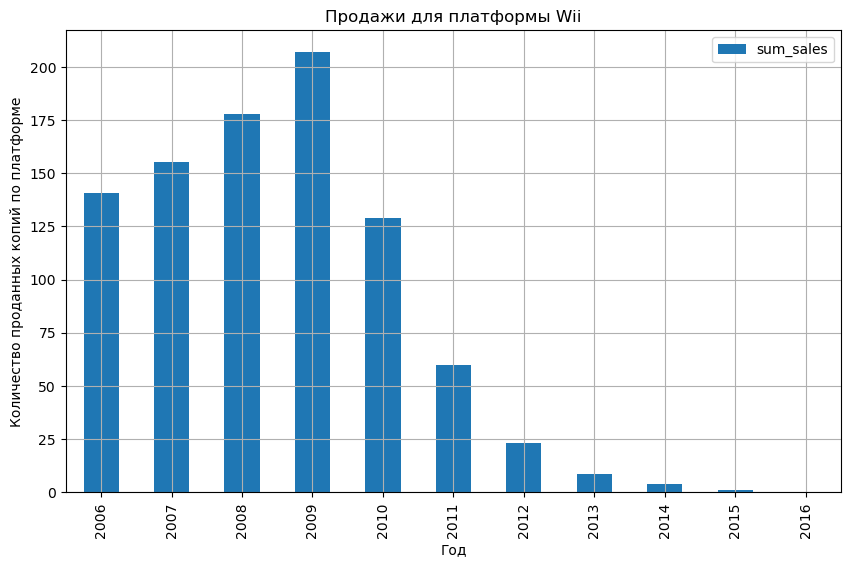

In [50]:
wii.plot(x='year_of_release', y='sum_sales', kind='bar', figsize=(10, 6), grid=True, title ='Продажи для платформы Wii')
plt.xlabel('Год')
plt.ylabel('Количество проданных копий по платформе');

Данная платформа неплохо набирала продажи с первого года выхода и был замеен рост вплоть до 2009 года, но после продажи начали стремительно падать и в 2016 году совсем упали окончательно.

In [51]:
#по PS3
ps3 =data.query('platform == "PS3"').pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum')
ps3 = ps3.reset_index()
display(ps3)

,year_of_release,sum_sales
0,2005,0.19
1,2006,21.44
2,2007,74.81
3,2008,119.17
4,2009,130.93
5,2010,143.94
6,2011,158.61
7,2012,108.26
8,2013,113.25
9,2014,47.76


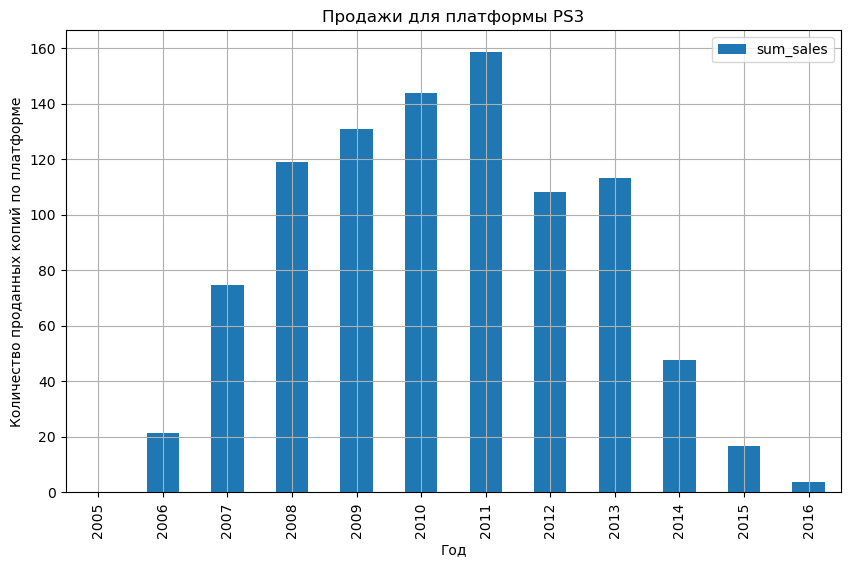

In [52]:
ps3.plot(x='year_of_release', y='sum_sales', kind='bar', figsize=(10, 6), grid=True, title ='Продажи для платформы PS3')
plt.xlabel('Год')
plt.ylabel('Количество проданных копий по платформе');

Платформа вышла в 2006 году, поэтому не могут быть продажи раньше этого времени. Найдем данные за 2005 год, поправим или дуалим данные.

In [53]:
display(data.loc[(data['year_of_release'] == 2005) &(data['platform'] == 'PS3')]) 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
7558,WRC: FIA World Rally Championship,PS3,2005,Racing,0.0,0.14,0.01,0.04,68.0,4.5,NaN,0.19


In [54]:
data.loc[7583, 'year_of_release'] = 2010 # эта игра вышла в 2010 году

In [55]:
display(data.loc[(data['year_of_release'] == 2005) &(data['platform'] == 'PS3')]) 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
7558,WRC: FIA World Rally Championship,PS3,2005,Racing,0.0,0.14,0.01,0.04,68.0,4.5,NaN,0.19


In [56]:
#по PS3
ps3 =data.query('platform == "PS3"').pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum')
ps3 = ps3.reset_index()
display(ps3)

,year_of_release,sum_sales
0,2005,0.19
1,2006,21.44
2,2007,74.81
3,2008,119.17
4,2009,130.93
5,2010,143.94
6,2011,158.61
7,2012,108.26
8,2013,113.25
9,2014,47.76


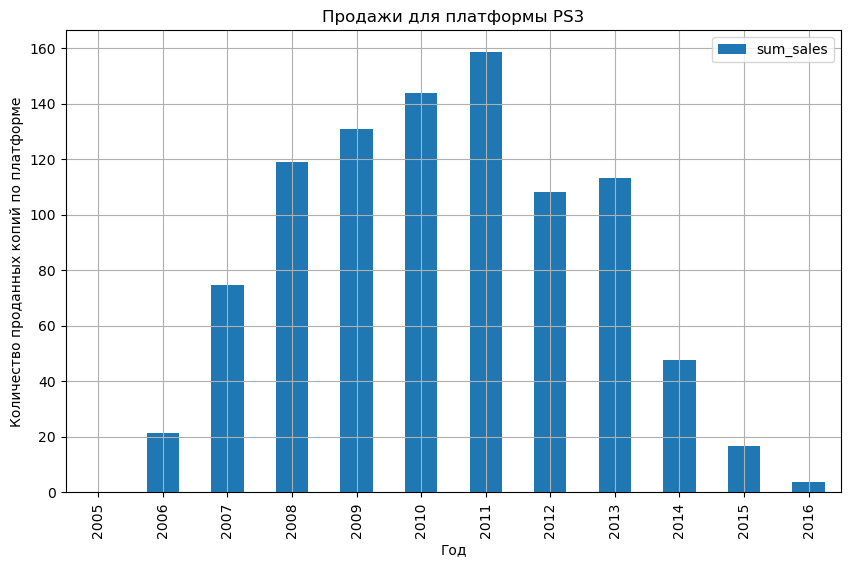

In [57]:
ps3.plot(x='year_of_release', y='sum_sales', kind='bar', figsize=(10, 6), grid=True, title ='Продажи для платформы PS3')
plt.xlabel('Год')
plt.ylabel('Количество проданных копий по платформе');

Платформа вышла в конце 2006 года, поэтому наблюдется резкий скачок между 2006 и 2007 годом. после чего платформа продолжила рост вплоть до 2013 года набрав пиковое значение и после 2011 начался спад. Сначала он был незначительным, в после и вовсе в 2013 гду был замечен небольшой рост относительно 2012 года. Но увы, в 2014 году значения продаж стали значительно пададь. Все-таки новые платформы(вышедшие в 2013 году PS4 и Xbox One) стали брать больше продаж на себя.

In [58]:
#по X360
x360 =data.query('platform == "X360"').pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum')
x360 = x360.reset_index()
display(x360)

,year_of_release,sum_sales
0,2005,9.22
1,2006,51.79
2,2007,97.88
3,2008,136.51
4,2009,120.82
5,2010,170.55
6,2011,145.91
7,2012,100.72
8,2013,88.58
9,2014,34.74


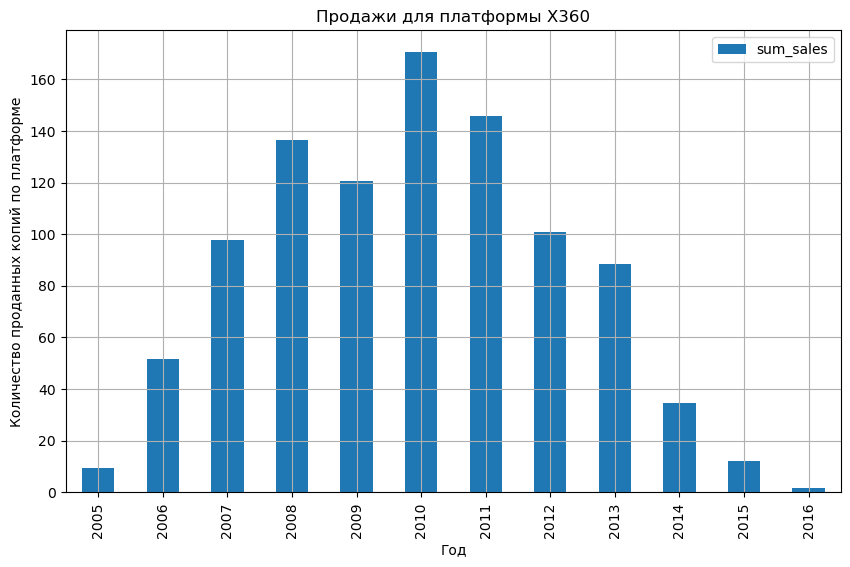

In [59]:
x360.plot(x='year_of_release', y='sum_sales', kind='bar', figsize=(10, 6), grid=True, title ='Продажи для платформы X360')
plt.xlabel('Год')
plt.ylabel('Количество проданных копий по платформе');

XBox 360 так же начал с хорошего роста вплоть до 2010 года, но после началось равномерное падение. Смотря на предыдущий график отчетливо видно, как в 2013 году поменялся спрос на платформу, так же и здесь, наблюдется резвое снижение продаж, после выхода платформ.

In [60]:
#по PS2
ps2 =data.query('platform == "PS2"').pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum')
ps2 = ps2.reset_index()
display(ps2)

,year_of_release,sum_sales
0,2000,39.17
1,2001,166.82
2,2002,209.63
3,2003,193.05
4,2004,211.81
5,2005,160.66
6,2006,104.87
7,2007,77.22
8,2008,53.90
9,2009,26.40


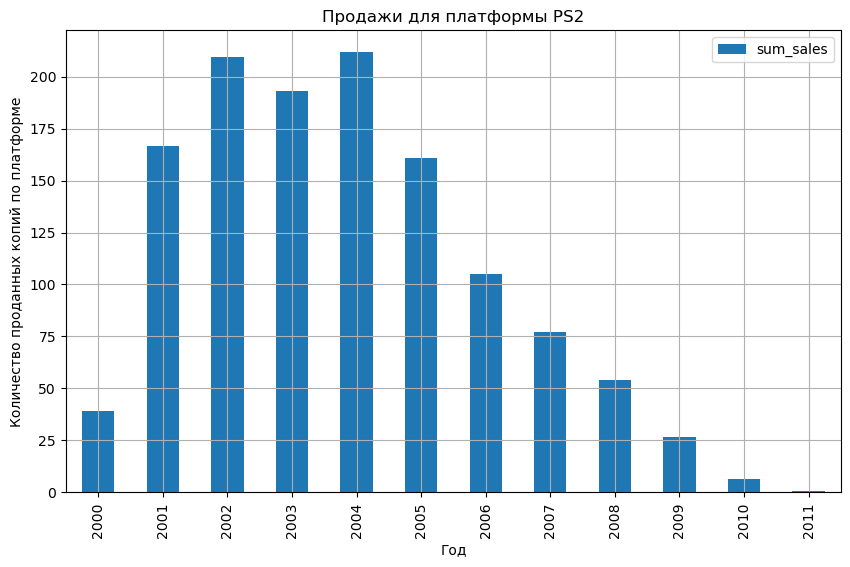

In [61]:
ps2.plot(x='year_of_release', y='sum_sales', kind='bar', figsize=(10, 6), grid=True, title ='Продажи для платформы PS2')
plt.xlabel('Год')
plt.ylabel('Количество проданных копий по платформе');

Платформа так же начала с хорошего роста и были небольшие колебания на пиковых значения , но также после выхода новой платформы заметный спад в продажах. Как можно видеть по всем этим графикам, существует определенный срок жизни платформ, в основном это связано с выходом более новый, технологичных устройств, что переманивает пользователей и рост наблюдается уже у новых платорм.

In [62]:
platform_year= data.pivot_table(index='platform', values ='year_of_release', aggfunc=['max','min'])

platform_year['platform_count_year'] = platform_year['max']- platform_year['min']
platform_year.columns =['max_year', 'min_year', 'platform_count_year']
platform_year_mean = round(platform_year['platform_count_year'].mean())
print(f'Средний срок появления и исчезновения платформ: {platform_year_mean} лет')
display(platform_year)

Средний срок появления и исчезновения платформ: 9 лет


,max_year,min_year,platform_count_year
platform,,,
2600,2016,1977,39
3DO,1995,1994,1
3DS,2016,2010,6
DC,2008,1998,10
DS,2013,1985,28
GB,2001,1988,13
GBA,2007,2000,7
GC,2007,2001,6
GEN,1994,1990,4


Как можно увидеть из расчетов, что среднее время с появления до исчезновения новой платформы в среднем равняется 8 годам. Однако, если рассматривать платформы отдельно, можно увидеть, что многие платформы существуют больше 10 лет. Некоторые, как PC  и 2600 существуют уже 31 и 39 лет соответственно, что довольно много. Какие-то платформы быстро идут на спад и популярность их недолгая, а какие-то платформы живут долго и пользуются спросом, может не таким большим, но все же, не на каждую платформу выпускают игры более 30 лет.

#### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Думаю лучше взять период, судя по графику "Количество игр выпускаемое в разные годы", за года от 2009, для того чтобы можно было включить в анализ данные с большинством продаж и данные после спада продаж, возможно можно будет увидеть какую-то зависимость между этими данными. Также судя по периоду появления и исчезновения новой платформы можно увидеть актуальные данные для все продолжительности продаж для новой платформы от начала до конца.

In [63]:
data['year_of_release'].describe()

count    16598.000000
mean      2006.478250
std          5.891876
min       1977.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

In [64]:
actual_period= data.query('year_of_release > 2009')
actual_period=actual_period.pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum')
actual_period = actual_period.drop(columns=['2600']) #удалим платформу с одной продажей, на гафике они нам ничего не покажут

display(actual_period)

platform,3DS,DS,N64,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,,,
2010,0.32,85.35,0.2,26.15,6.59,143.94,NaN,35.04,NaN,129.08,NaN,170.55,NaN
2011,63.20,26.33,NaN,35.77,0.45,158.61,NaN,17.82,4.63,59.79,NaN,145.91,NaN
2012,51.76,11.67,NaN,23.45,NaN,108.26,NaN,7.95,16.19,22.94,17.56,100.72,NaN
2013,56.57,1.54,NaN,12.66,NaN,113.25,25.99,3.38,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,NaN,13.63,NaN,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,NaN,8.52,NaN,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,NaN,5.25,NaN,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


In [65]:
actual_data= data.query('year_of_release > 2012')

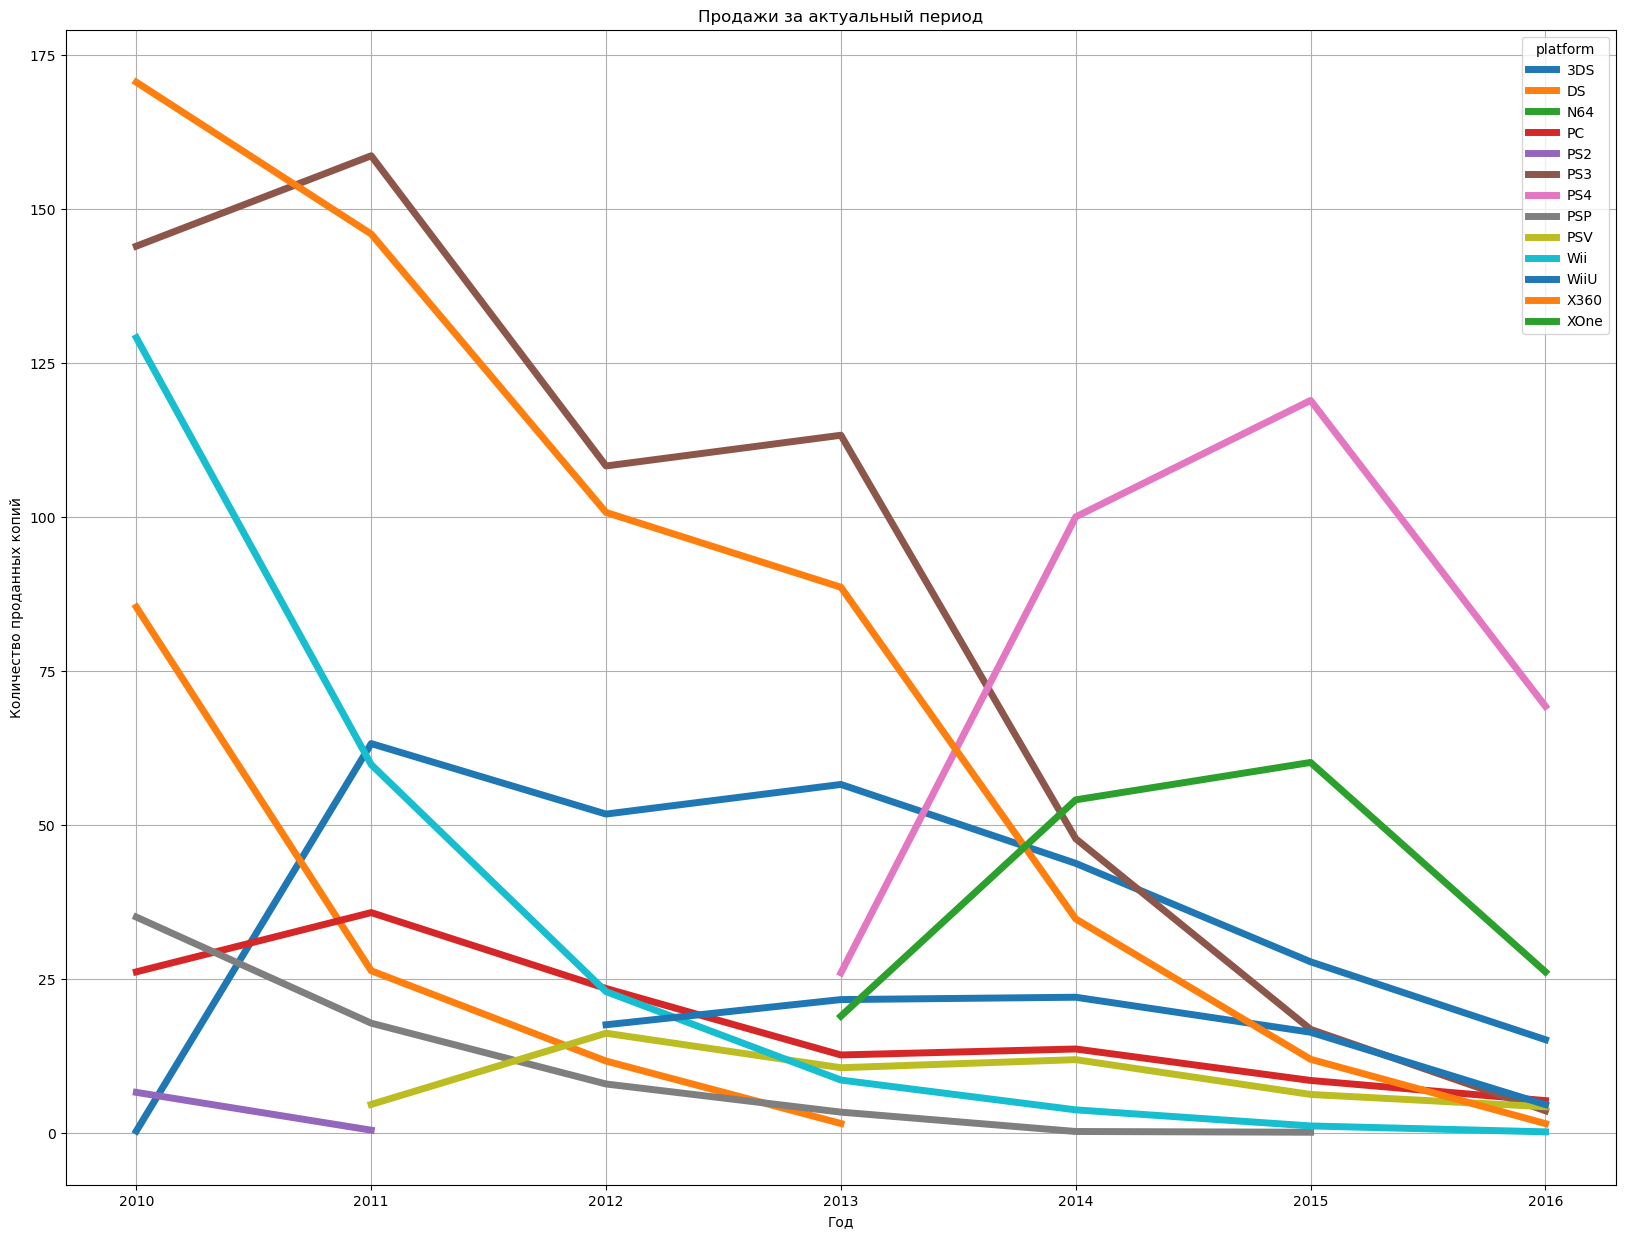

In [66]:
actual_period.plot(figsize=(20, 15), grid=True, title ='Продажи за актуальный период', linewidth= 5)
plt.xlabel('Год')
plt.ylabel('Количество проданных копий');

In [67]:
actual_period= data.query('year_of_release > 2012') #включая 2013 год
actual_period=actual_period.pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum')
actual_period = actual_period.drop(columns=['2600','DS']) #удалим платформу с одной продажей, на гафике они нам ничего не покажут

display(actual_period)

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2013,56.57,12.66,113.25,25.99,3.38,10.59,8.59,21.65,88.58,18.96
2014,43.76,13.63,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


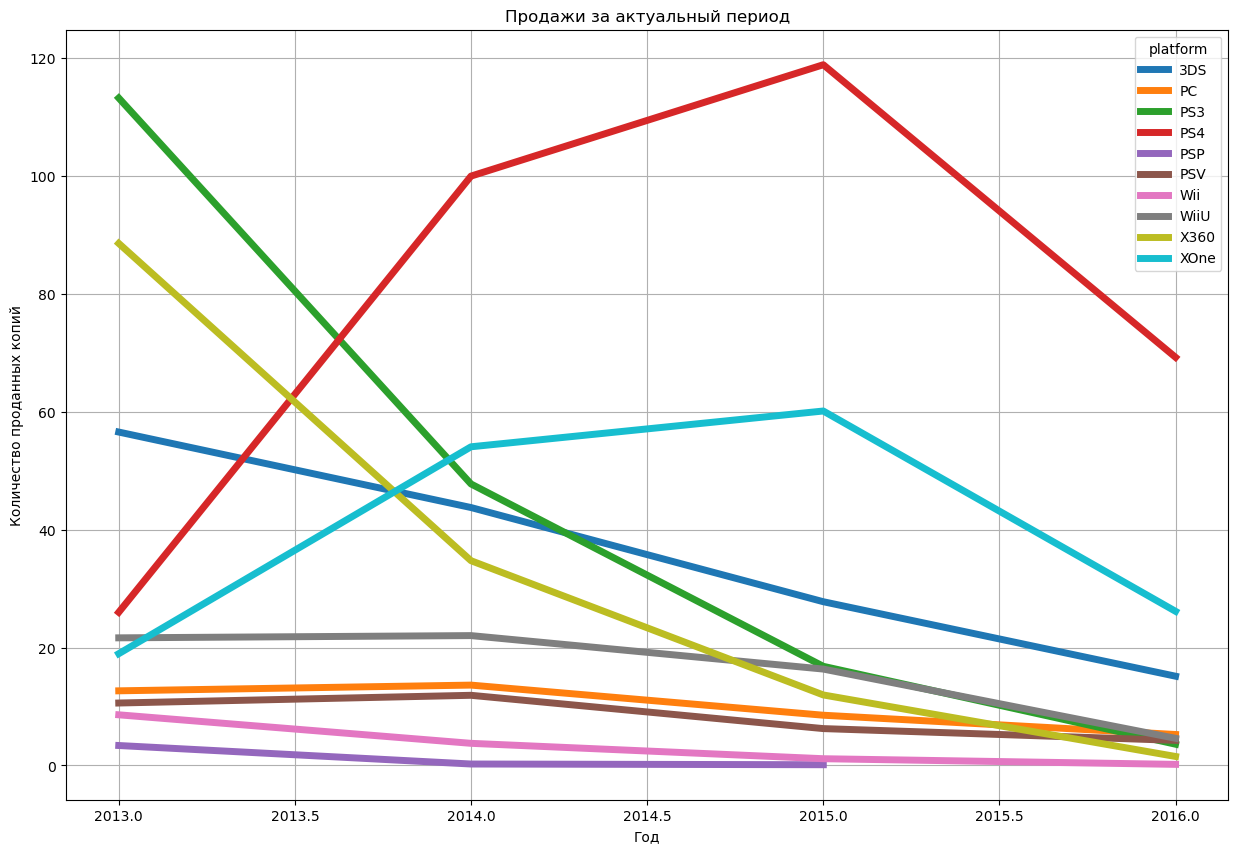

In [68]:
actual_period.plot(figsize=(15, 10), grid=True, title ='Продажи за актуальный период', linewidth= 5)
plt.xlabel('Год')
plt.ylabel('Количество проданных копий');

У большинства платформ видно спад продаж и к 2016 году постепенно идет к нулю, это может значить, что платформы теряют популярность, устаревают и возможно уже не будут приносить прибыль как раньше. С 2013 года наблюдается рост у платформ которые вышли недавно, возможно, будет наблюдаться такая же популярность, как у устаревших платформ, спад в 2016 году - это неполные данные за этот год, поэтому, мы не можем оценивать это как уменьшение количества проданных копий. Но также нужно понимать, что нет смысла для прогноза на 2017 год рассматривать платформы, которые врятли уже будут так популярны. Более правильным будет посмотреть на платформы которые только начинают расти и данный по ним для нас более актуальны. И также получили список платформ, которые можно использовать для дальнейшего анализа.

#### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.


In [69]:
period= data.query('year_of_release > 2012')
period =period.pivot_table(index='platform', values='sum_sales', aggfunc='sum')
period = period.reset_index().sort_values(by='sum_sales', ascending=False)
period = period.reset_index(drop=True)
period.columns = ['platform', 'sum_sales_pf']
period= period.nlargest(5, 'sum_sales_pf')
display(period)

,platform,sum_sales_pf
0,PS4,314.14
1,PS3,181.43
2,XOne,159.32
3,3DS,143.25
4,X360,136.80


По суммарному количеству проданных копий за актуальный период лидирует платформа вышедшая в 2013 году PS4, после нее идет PS3. На 3 месте относительно новая платформа XOne. Далее построим для каждого гистограмму, чтобы понять, как они себя видут в зависимости он года, растут или падают.

In [70]:
#по PS4
#исключим 2016 год, т.к. он не покажет нам полные данные по году
ps4_sales =data.loc[(data['year_of_release'] > 2012) &(data['platform'] == 'PS4')&(data['year_of_release'] < 2016)].pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum')
ps4_sales = ps4_sales.reset_index()
display(ps4_sales)

,year_of_release,sum_sales
0,2013,25.99
1,2014,100.00
2,2015,118.90


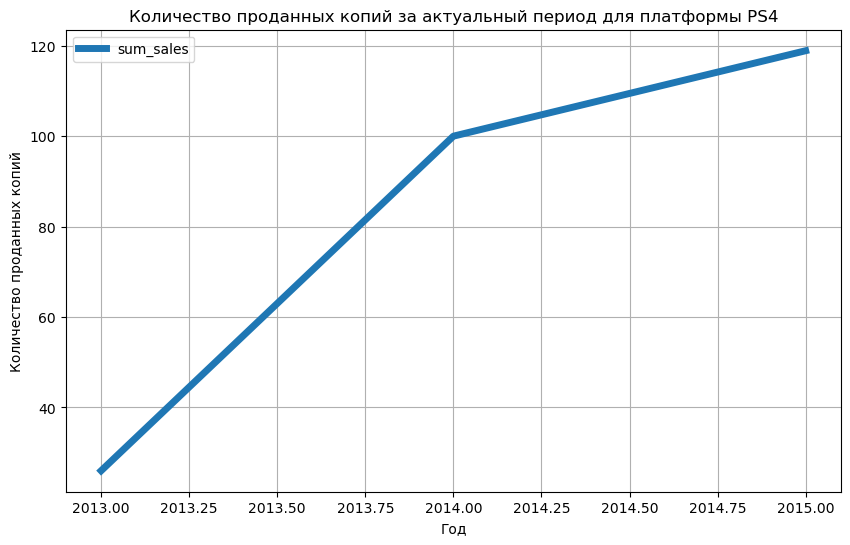

In [71]:
ps4_sales.plot(x='year_of_release', y='sum_sales', figsize=(10, 6), grid=True, title ='Количество проданных копий за актуальный период для платформы PS4', linewidth= 5)
plt.xlabel('Год')
plt.ylabel('Количество проданных копий');

Продажи относительно новой платформы растут.

In [72]:
#по PS3
#исключим 2016 год, т.к. он не покажет нам полные данные по году
ps3_sales =data.loc[(data['year_of_release'] > 2012) & (data['platform'] == 'PS3')&(data['year_of_release'] < 2016)].pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum')
ps3_sales = ps3_sales.reset_index()
display(ps3_sales)

,year_of_release,sum_sales
0,2013,113.25
1,2014,47.76
2,2015,16.82


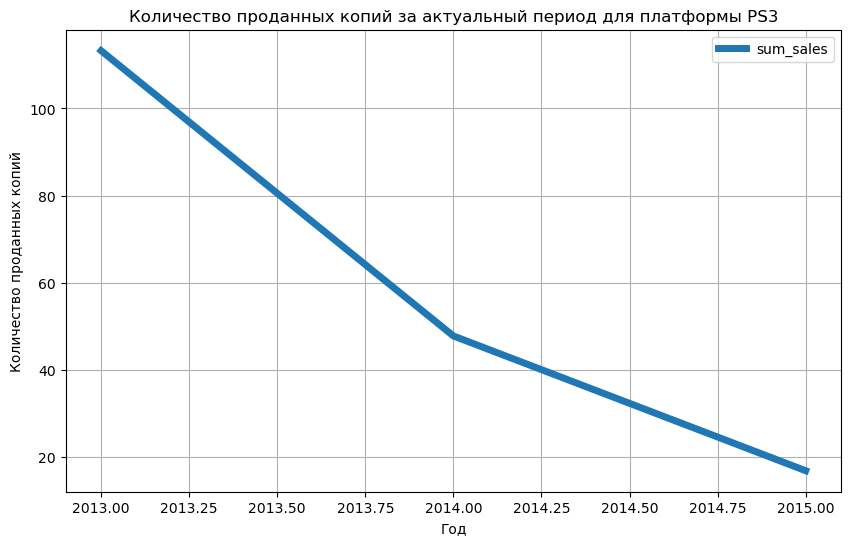

In [73]:
ps3_sales.plot(x='year_of_release', y='sum_sales', figsize=(10, 6), grid=True, title ='Количество проданных копий за актуальный период для платформы PS3', linewidth= 5)
plt.xlabel('Год')
plt.ylabel('Количество проданных копий');

Продажи пошли в затяжное падение и стремятся к нулю.

In [74]:
#по XOne
#исключим 2016 год, т.к. он не покажет нам полные данные по году
xone_sales =data.loc[(data['year_of_release'] > 2012) &(data['platform'] == 'XOne')&(data['year_of_release'] < 2016)].pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum')
xone_sales = xone_sales.reset_index()
display(xone_sales)

,year_of_release,sum_sales
0,2013,18.96
1,2014,54.07
2,2015,60.14


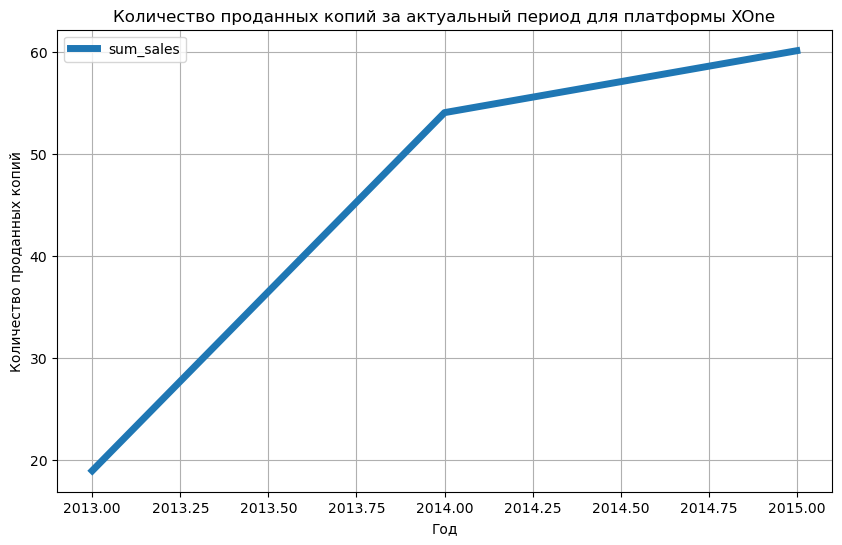

In [75]:
xone_sales.plot(x='year_of_release', y='sum_sales', figsize=(10, 6), grid=True, title ='Количество проданных копий за актуальный период для платформы XOne', linewidth= 5)
plt.xlabel('Год')
plt.ylabel('Количество проданных копий');

Продажи относительно новой платформы растут.

In [76]:
#по 3DS
#исключим 2016 год, т.к. он не покажет нам полные данные по году
ds_sales =data.loc[(data['year_of_release'] > 2012) &(data['platform'] == '3DS')&(data['year_of_release'] < 2016)].pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum')
ds_sales = ds_sales.reset_index()
display(xone_sales)

,year_of_release,sum_sales
0,2013,18.96
1,2014,54.07
2,2015,60.14


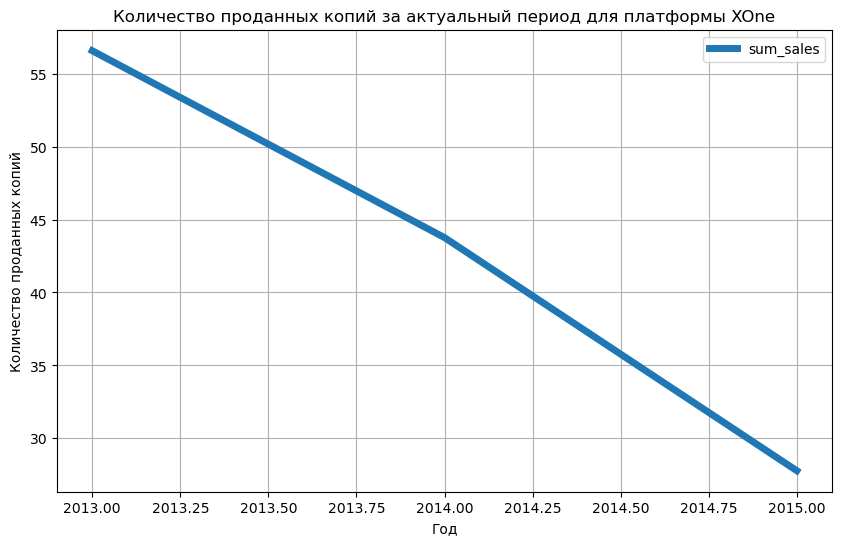

In [77]:
ds_sales.plot(x='year_of_release', y='sum_sales', figsize=(10, 6), grid=True, title ='Количество проданных копий за актуальный период для платформы XOne', linewidth= 5)
plt.xlabel('Год')
plt.ylabel('Количество проданных копий');

Замечено плавное падение 

In [78]:
#по X360
#исключим 2016 год, т.к. он не покажет нам полные данные по году
x360_sales =data.loc[(data['year_of_release'] > 2012) &(data['platform'] == 'X360')&(data['year_of_release'] < 2016)].pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum')
x360_sales = x360_sales.reset_index()
display(x360_sales)

,year_of_release,sum_sales
0,2013,88.58
1,2014,34.74
2,2015,11.96


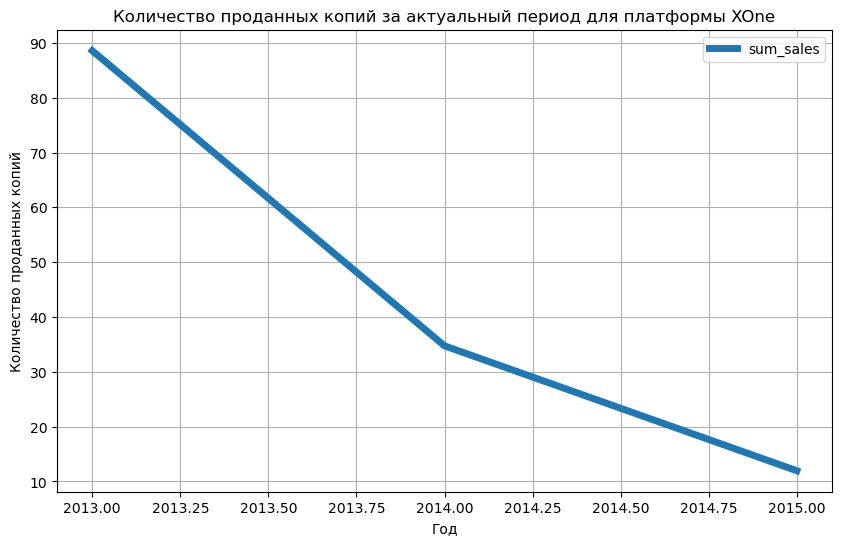

In [79]:
x360_sales.plot(x='year_of_release', y='sum_sales', figsize=(10, 6), grid=True, title ='Количество проданных копий за актуальный период для платформы XOne', linewidth= 5)
plt.xlabel('Год')
plt.ylabel('Количество проданных копий');

Падение составило от 90 млн копий до чуть больше 10.

По графикам видно, что платформы которые были до выпущены после 2013 года пока показываеют рост, относительно тх платформ которые вышли гораздо позже.

#### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

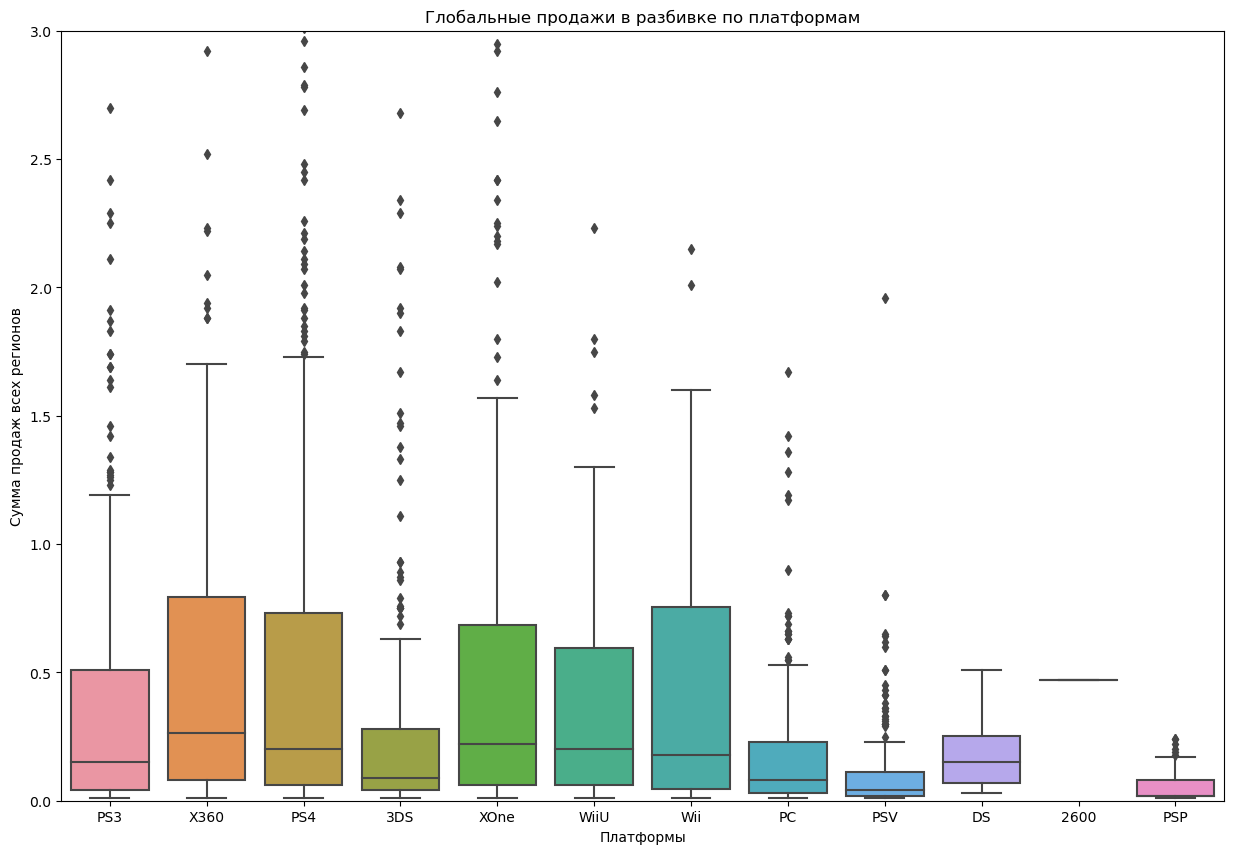

In [80]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='platform', y='sum_sales', data=actual_data)
plt.title('Глобальные продажи в разбивке по платформам')
plt.xlabel('Платформы')
plt.ylabel('Сумма продаж всех регионов')
plt.ylim(0, 3);

Верхнее квартиль всех платформ не превышает 0,8 млн копий большинства, а медиана лежит примерно около 0,3 млн копий. Однако у многих платформ можно наблюдать большие выбросы в значениях. Это могут быть отдельные популярные игры продажи которых значительно выше обычных игр. Единственная платформа у которой нет выбросов это DS.

#### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Для лучше наглядности и более актуальных данных возьмем и сравним две последнии платформы, вышедшие в 2013 году. Это PS4 и XOne. Для этого будет необходимо построить диаграмму рассеяния зависимости продаж от отзывов пользователей и количество продаж от отзывов критиков.

In [81]:
actual_data= data.loc[(data['year_of_release'] > 2012)]
ps4_diagram = actual_data.query('platform == "PS4"')
display(ps4_diagram)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,0.0,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,0.0,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16384,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,NaN,0.01
16387,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,NaN,0.0,NaN,0.01
16409,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
16413,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


In [82]:
xone_diagram = actual_data.query('platform == "XOne"')
display(xone_diagram)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,0.0,NaN,7.39
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
...,...,...,...,...,...,...,...,...,...,...,...,...
16513,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01
16526,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,NaN,6.6,E,0.01
16528,ZombiU,XOne,2016,Action,0.00,0.01,0.00,0.00,NaN,0.0,NaN,0.01
16543,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,NaN,0.01


In [83]:
print('Корреляцию между отзывами критиков и продажами для платформы PS4:', ps4_diagram['critic_score'].corr(ps4_diagram['sum_sales']))

Корреляцию между отзывами критиков и продажами для платформы PS4: 0.4065679020617815


In [84]:
print('Корреляцию между отзывами критиков и продажами для платформы XOne:', xone_diagram['critic_score'].corr(xone_diagram['sum_sales']))

Корреляцию между отзывами критиков и продажами для платформы XOne: 0.4169983280084016


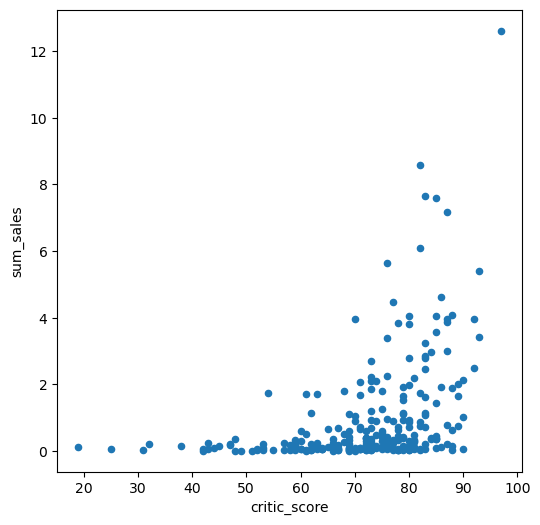

In [85]:
ps4_diagram.plot(x='critic_score', y='sum_sales', kind='scatter', figsize=(6,6));

По диаграмме рассеяния видно, что есть зависимость между оценкой критиков и суммарными продажами. И по корреляции так же видно, она положительная.

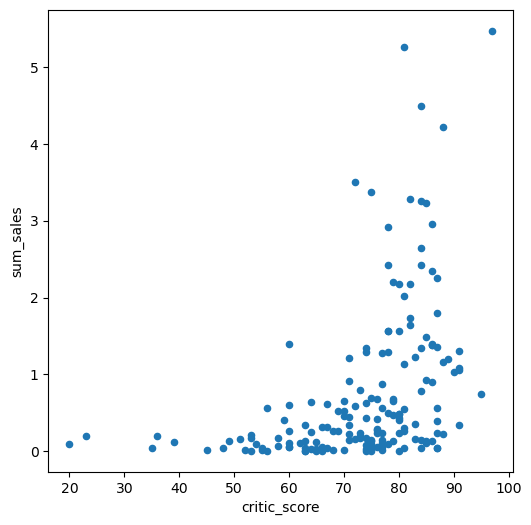

In [86]:
xone_diagram.plot(x='critic_score', y='sum_sales', kind='scatter', figsize=(6, 6));

Здесь особо ситуация не меняется дл XOne очень похожие диаграммы.

In [87]:
filtered_data=actual_data[(actual_data['user_score'] != 0)]
ps4_diagram=filtered_data[(filtered_data.platform == "PS4")]

In [88]:
xone_diagram=filtered_data[(filtered_data.platform == "XOne")]

In [89]:
print('Корреляцию между отзывами пользователей и продажами для платформы PS4:', ps4_diagram['user_score'].corr(ps4_diagram['sum_sales']))

Корреляцию между отзывами пользователей и продажами для платформы PS4: -0.03195711020455645


In [90]:
print('Корреляцию между отзывами пользователей и продажами для платформы XOne:', xone_diagram['user_score'].corr(xone_diagram['sum_sales']))

Корреляцию между отзывами пользователей и продажами для платформы XOne: -0.06892505328279416


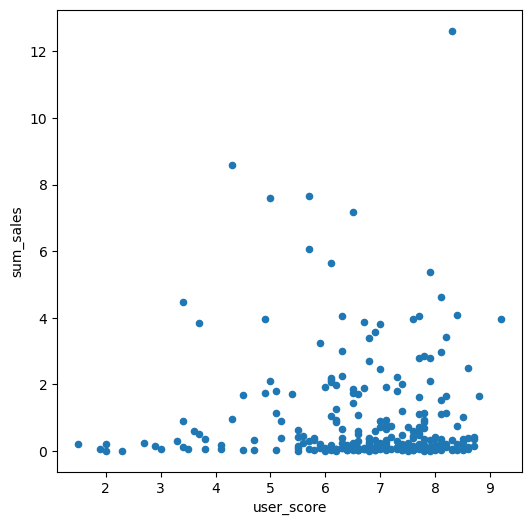

In [91]:
ps4_diagram.plot(x='user_score', y='sum_sales', kind='scatter', figsize=(6,6));

Зависимость между продажами и оценкой пользователей отсутствует. Корреляция практически нулевая.

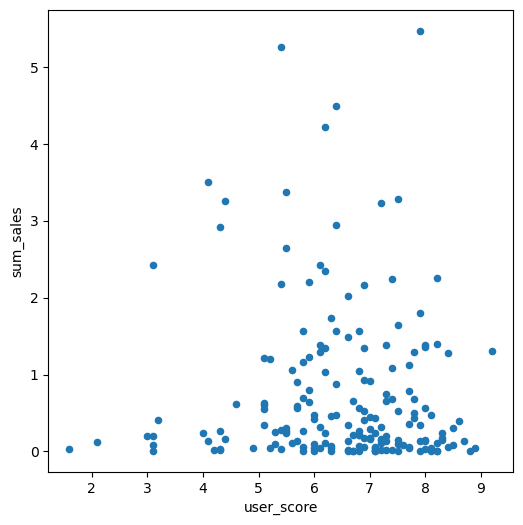

In [92]:
xone_diagram.plot(x='user_score', y='sum_sales', kind='scatter', figsize=(6,6));

На этой диаграмме впринципе ситауция схожа с предыдущей.

Построив диаграмму рассеяния и посчитав корреляцию, можно понять, что есть небольшая зависимость между оценками критиков на продажи той или иной игры. Продаи не зависят от оценки пользователей. Все-таки можно сказать, что на оценки критиков пользователь больше смотрит, чем на оценки пользователей.

In [93]:
display(actual_data['platform'].unique())

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', '2600', 'PSP'], dtype=object)

#### Соотнесите выводы с продажами игр на других платформах.

Корреляцию между отзывами пользователей и продажами для платформы 3DS: 0.2415041177356301
Корреляцию между отзывами критиков и продажами для платформы 3DS: 0.3392349287853148


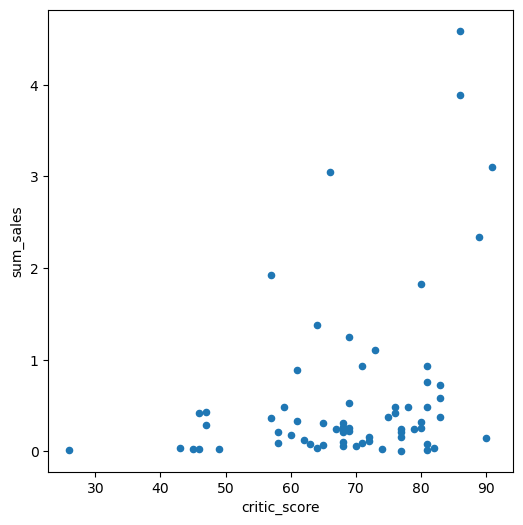

In [94]:
tds_diagram=filtered_data[(filtered_data.platform == "3DS")]
tds_diagram.plot(x='critic_score', y='sum_sales', kind='scatter', figsize=(6,6));

print('Корреляцию между отзывами пользователей и продажами для платформы 3DS:', tds_diagram['user_score'].corr(tds_diagram['sum_sales']))
print('Корреляцию между отзывами критиков и продажами для платформы 3DS:', tds_diagram['critic_score'].corr(tds_diagram['sum_sales']))

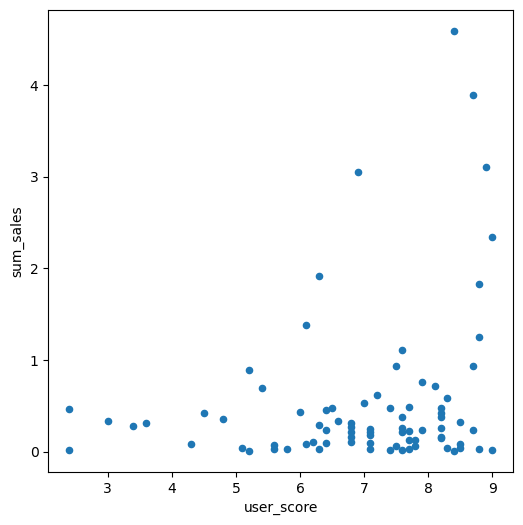

In [95]:
tds_diagram.plot(x='user_score', y='sum_sales', kind='scatter', figsize=(6,6));

Небольшая завсимость между оценками все же наблюдется для платформы 3DS, корреляция положительная.

Корреляцию между отзывами пользователей и продажами для платформы PC: -0.08999775678448751
Корреляцию между отзывами критиков и продажами для платформы PC: 0.1977898633499025


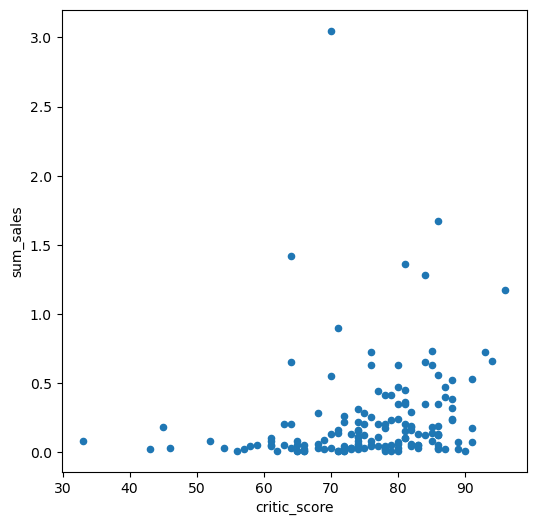

In [96]:
pc_diagram=filtered_data[(filtered_data.platform == "PC")]
pc_diagram.plot(x='critic_score', y='sum_sales', kind='scatter', figsize=(6,6));

print('Корреляцию между отзывами пользователей и продажами для платформы PC:', pc_diagram['user_score'].corr(pc_diagram['sum_sales']))
print('Корреляцию между отзывами критиков и продажами для платформы PC:', pc_diagram['critic_score'].corr(pc_diagram['sum_sales']))

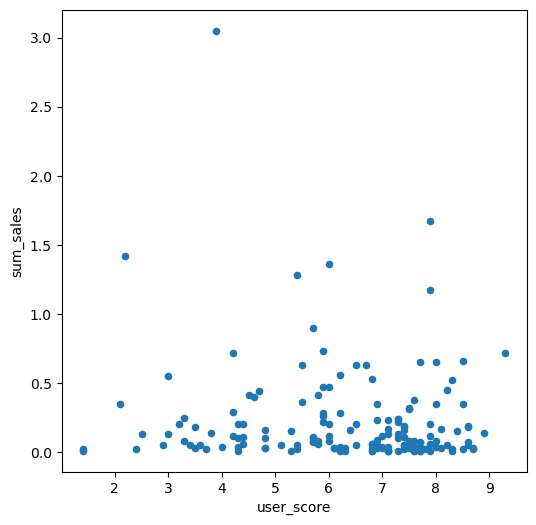

In [97]:
pc_diagram.plot(x='user_score', y='sum_sales', kind='scatter', figsize=(6,6));

Для платформы PC зависимость между оценкой пользователей и продажами отсутствует. А вот оценка критиков более отчетливо выражена и наблюдается небольшая зависимость.

Корреляцию между отзывами пользователей и продажами для платформы WiiU: 0.4193304819266185
Корреляцию между отзывами критиков и продажами для платформы WiiU: 0.37950449899784144


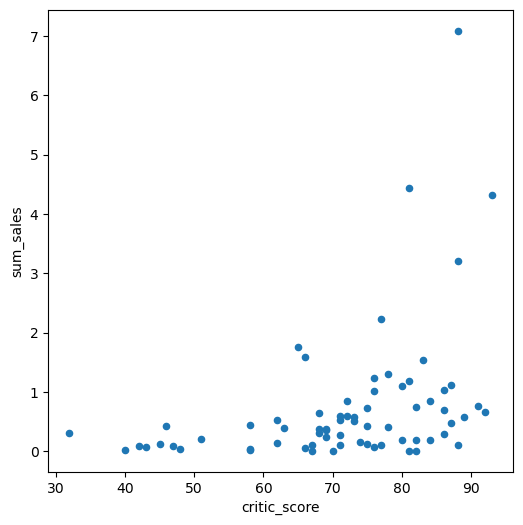

In [98]:
wiiu_diagram=filtered_data[(filtered_data.platform == "WiiU")]
wiiu_diagram.plot(x='critic_score', y='sum_sales', kind='scatter', figsize=(6,6));

print('Корреляцию между отзывами пользователей и продажами для платформы WiiU:', wiiu_diagram['user_score'].corr(wiiu_diagram['sum_sales']))
print('Корреляцию между отзывами критиков и продажами для платформы WiiU:', wiiu_diagram['critic_score'].corr(wiiu_diagram['sum_sales']))

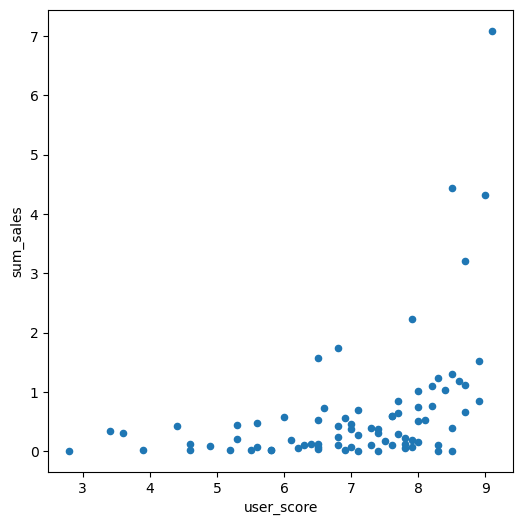

In [99]:
wiiu_diagram.plot(x='user_score', y='sum_sales', kind='scatter', figsize=(6,6));

Небольшая зависимость между оценками все же наблюдется для платформы WiiU, корреляция положительная.

Судя по диаграммам и посчитанной корреляции, оценка критиков больше влияет на продажи, чем оценки пользователей. На некоторых платформах оценки пользователей вообще никак не влияют на продажи.

#### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [100]:
top_genre = actual_data.pivot_table(index='genre', values='sum_sales', aggfunc=['sum','count'])
top_genre.columns = ['sum_sales_genre', 'count_genre']
top_genre= top_genre.sort_values(by='count_genre',ascending=False).reset_index()
display(top_genre)

,genre,sum_sales_genre,count_genre
0,Action,322.50,769
1,Role-Playing,145.89,292
2,Adventure,23.64,245
3,Sports,150.65,214
4,Shooter,232.98,187
5,Misc,63.06,156
6,Racing,39.89,85
7,Fighting,35.78,81
8,Platform,42.63,74
9,Simulation,21.76,62


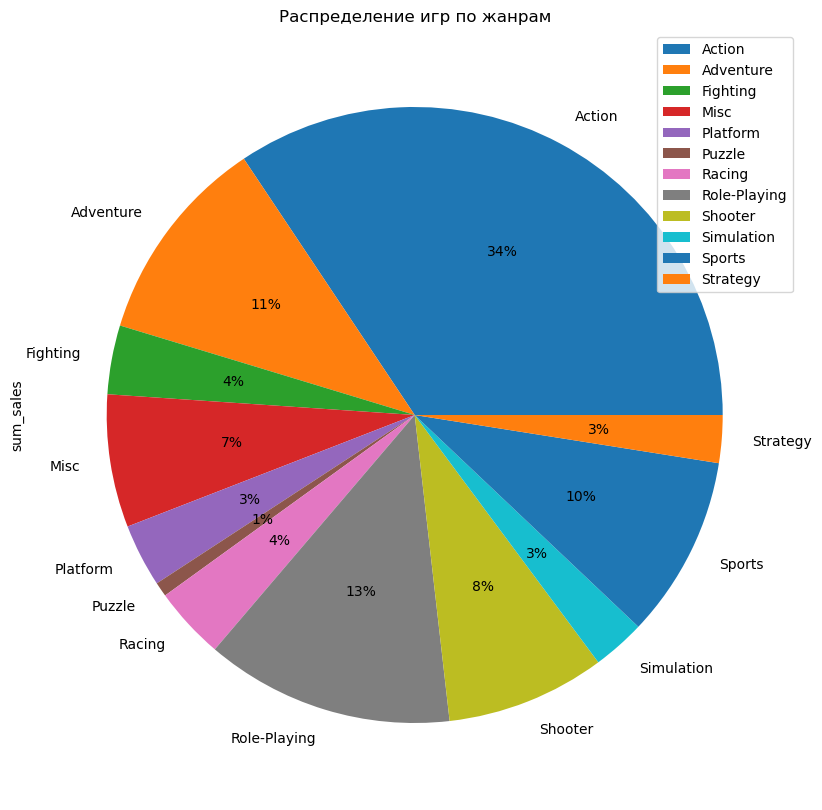

In [101]:
actual_data.pivot_table(index='genre', values='sum_sales', aggfunc=['sum','count']).plot(x='genre', y='count', kind='pie', autopct='%1.0f%%', figsize=(15, 10), title ='Распределение игр по жанрам');


Чуть больше трети занимает жанр Action, после него идет Role-Playing и Adventure. Доля трех популярных жанров чуть больше половины, что довольно много.

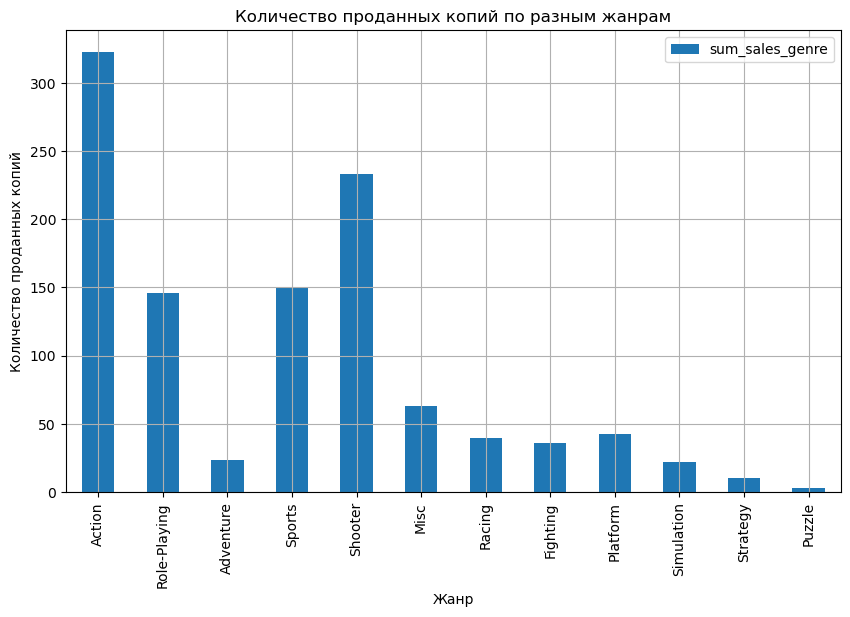

In [102]:
top_genre.plot(x='genre', y='sum_sales_genre', kind='bar', figsize=(10, 6), grid=True, title ='Количество проданных копий по разным жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество проданных копий');

Чтобы было более наглядно, отсортировали таблицу по количеству игр. Количество проданных копий можно сопоставить с количеством и увидим, что игр в жанре Action много, также много по ним продаж, тоесть жанр не просто популярен среди пользователей, но и приносит прибыль. А если посмотреть, например, на жанр Adventure, то видим, что количество игр достаточно большое, а вот количество проданных копи достаточно мало. А вот у жанра Shooter все наоборот, количество игр в данном жанре относительно мало, но продажи практически соизмеримы с самым большим по количеству игр жанром Action.

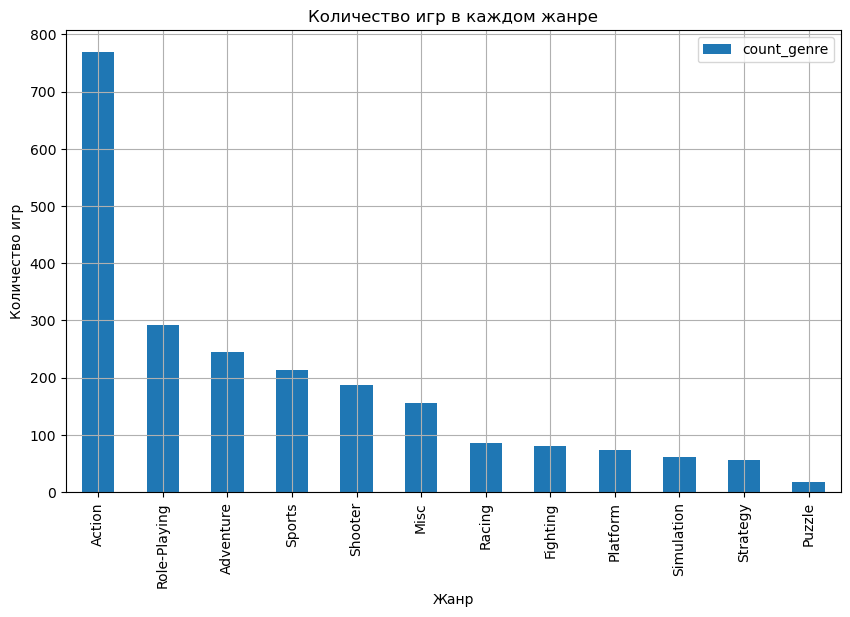

In [103]:
top_genre.plot(x='genre', y='count_genre', kind='bar', figsize=(10, 6), grid=True, title ='Количество игр в каждом жанре')
plt.xlabel('Жанр')
plt.ylabel('Количество игр');

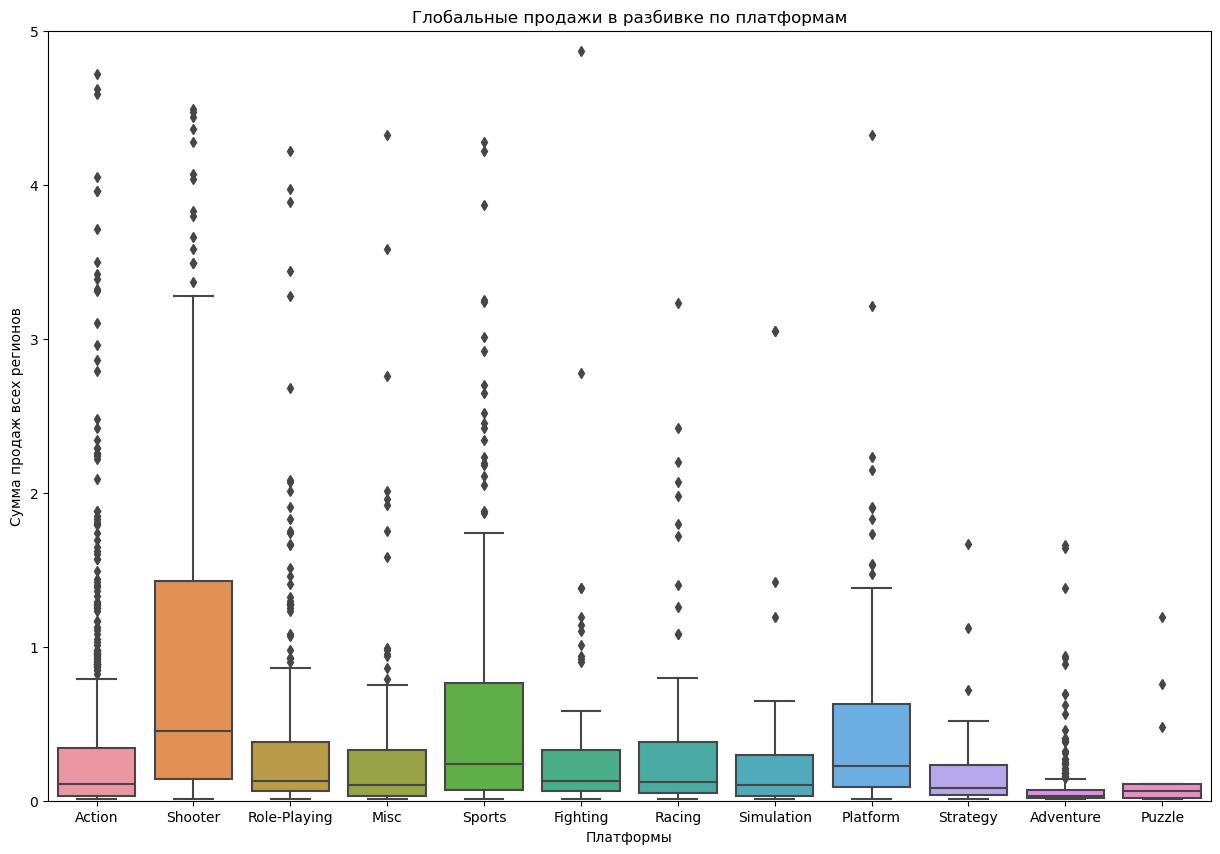

In [104]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='genre', y='sum_sales', data=actual_data)
plt.title('Глобальные продажи в разбивке по платформам')
plt.xlabel('Платформы')
plt.ylabel('Сумма продаж всех регионов')
plt.ylim(0, 5);

    По количеству игр жанра превосходит жанр Action - 769 игр. Игр этого жанра в сравнении с остальными гораздо больше. Самое меньшее количество игр в жанре Puzzle их всего 17 штук. Судя по графику boxplot можно увидеть, что медианное значение больше всего у жанра Shooter.

### Шаг 4. Составьте портрет пользователя каждого региона

#### Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [105]:
#топ 5 платформ в Северной Америке
na_top=actual_data.pivot_table(index='platform', values='na_sales', aggfunc='sum').nlargest(5, 'na_sales')
display(na_top)


,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


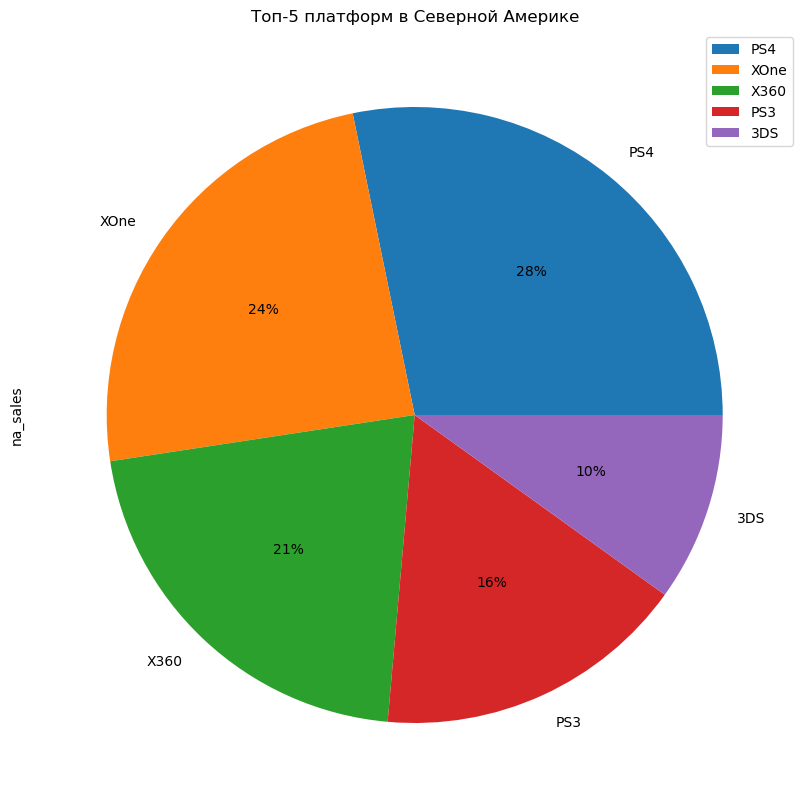

In [106]:
na_top.plot(y='na_sales', kind='pie', autopct='%1.0f%%', figsize=(15, 10), title ='Топ-5 платформ в Северной Америке');

Среди пятерки популярных платформ в Северной Америке лидирует PS4 - у нее 28%. После нее идет платформа XOne - 24%. Самая меньшая доля у платформы 3DS.

In [107]:
#топ 5 платформ в Европе
eu_top=actual_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum').nlargest(5, 'eu_sales')
display(eu_top)

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


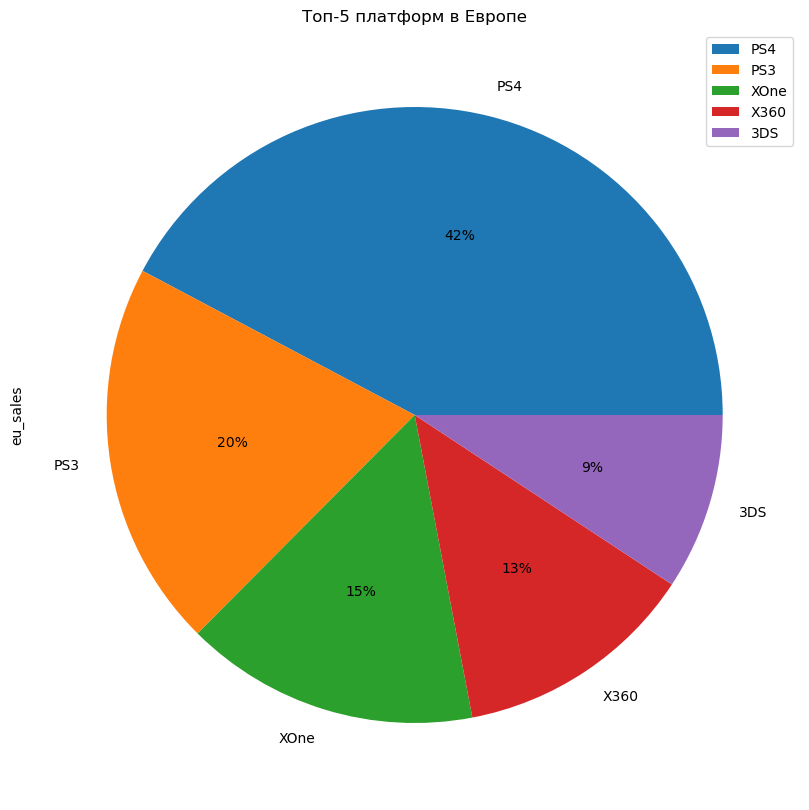

In [108]:
eu_top.plot(y='eu_sales', kind='pie', autopct='%1.0f%%', figsize=(15, 10), title ='Топ-5 платформ в Европе');

В Европе самой популярной платформой является также, как у Северной Америки PS4. В сравнении с Северной Америкой у PS4 в Европе больше доля - 42%, достаточно много, практически половина. PS3 пренадлежит доля - 20%. Меньше всего у все той же платформы 3DS. 

In [109]:
#топ 5 платформ в Японии
jp_top=actual_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum').nlargest(5, 'jp_sales')
display(jp_top)

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


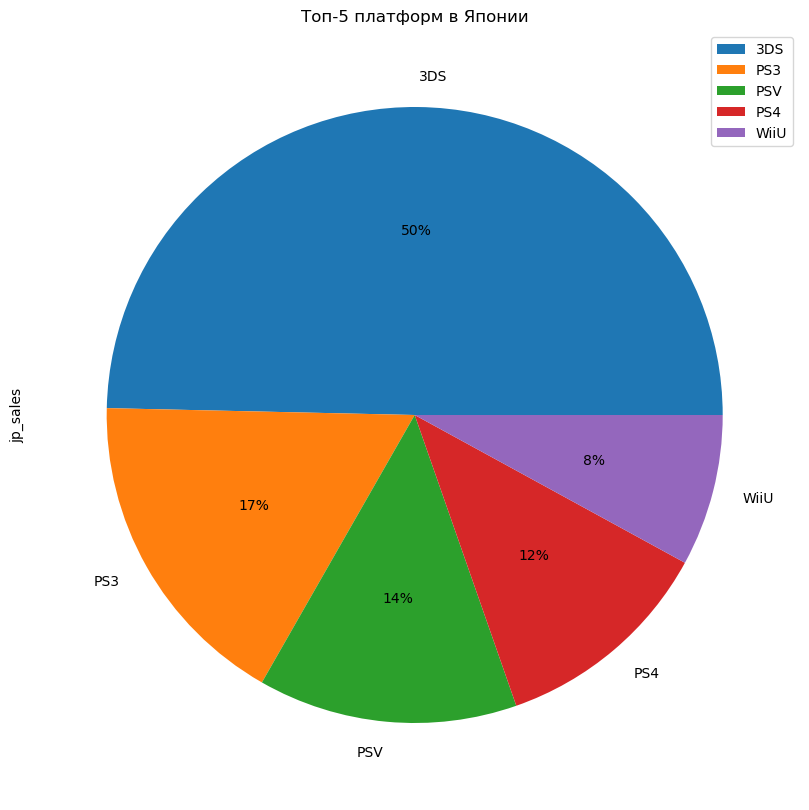

In [110]:
jp_top.plot(y='jp_sales', kind='pie', autopct='%1.0f%%', figsize=(15, 10), title ='Топ-5 платформ в Японии');

Половина всего рынка Японии пренадлежит платформе 3DS. Доля 17% у PS3. Меньшая доля у WiiU - 8%. Можно обратить внимание, что Xbox не вошел в пятерку популярных платформ Японии.

#### Самые популярные жанры (топ-5). Поясните разницу.

In [111]:
#топ 5 жанров в Северной Америке
na_top_genre=actual_data.pivot_table(index='genre', values='na_sales', aggfunc='sum').nlargest(5, 'na_sales')
display(na_top_genre)

,na_sales
genre,
Action,126.13
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


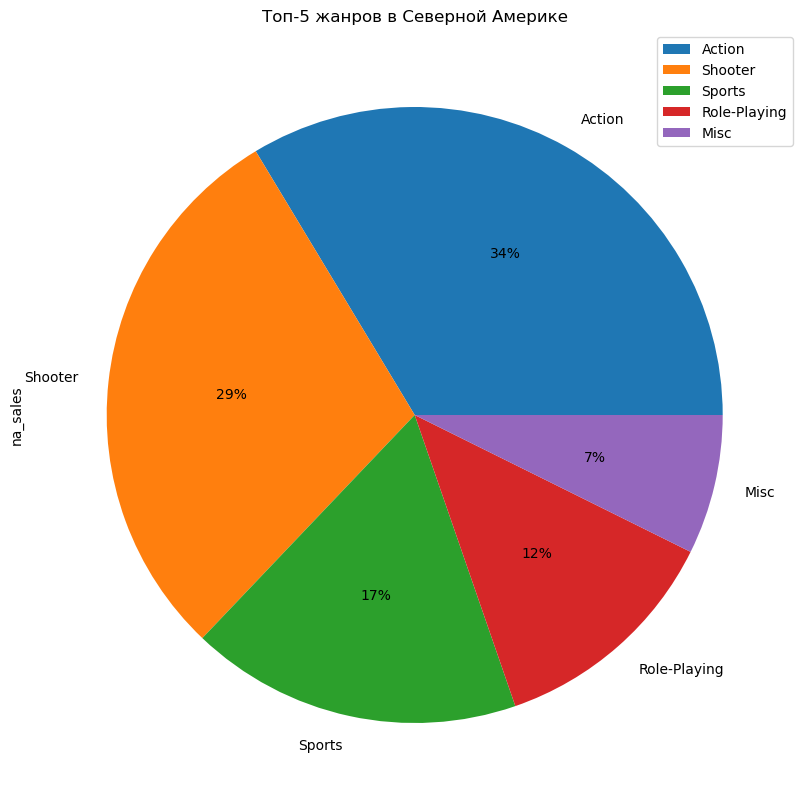

In [112]:
na_top_genre.plot(y='na_sales', kind='pie', autopct='%1.0f%%', figsize=(15, 10), title ='Топ-5 жанров в Северной Америке');

Среди самых популярных жанров в Северной Америке являются Action и Shooter - 34% и 29% соответственно. Жанр с самой низкой популярностью Misc - 7%.

In [113]:
#топ 5 жанров в Европе
eu_top_genre=actual_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').nlargest(5, 'eu_sales')
display(eu_top_genre)

,eu_sales
genre,
Action,118.61
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


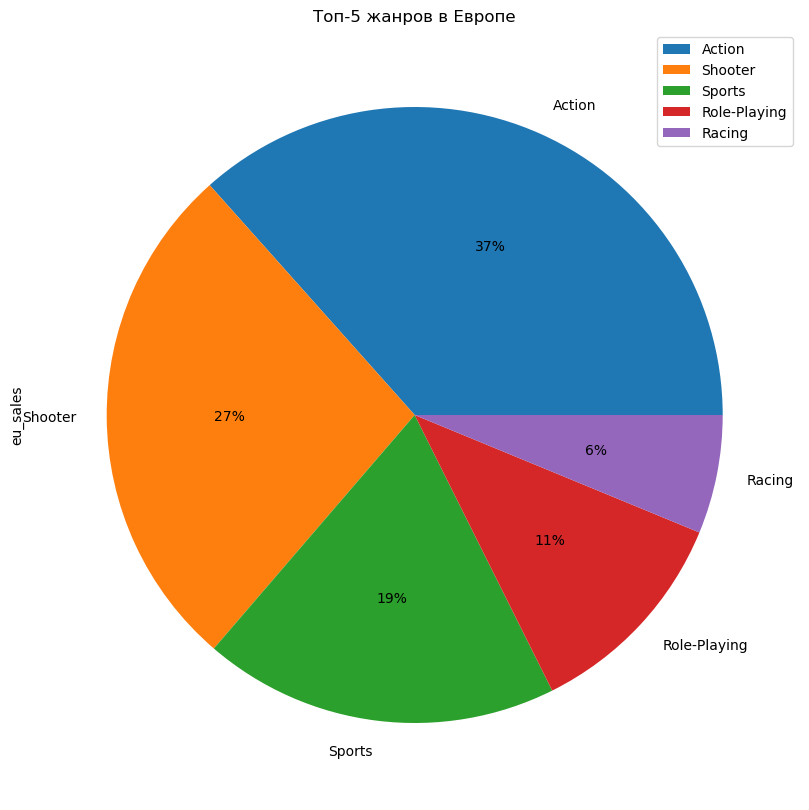

In [114]:
eu_top_genre.plot(y='eu_sales', kind='pie', autopct='%1.0f%%', figsize=(15, 10), title ='Топ-5 жанров в Европе');

Среди самых популярных жанров в Европе являются Action и Shooter - 34% и 27% соответственно. Жанр с самой низкой популярностью Racing - 6%. По сравнению с Северной Америкой популярные жанры Европы не изменились, можно сказать, что вкусы пользователей из Северной Америки и Европы - совпадают.

In [115]:
#топ 5 жанров в Японии
jp_top_genre=actual_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').nlargest(5, 'jp_sales')
display(jp_top_genre)

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.44
Fighting,7.65
Shooter,6.61


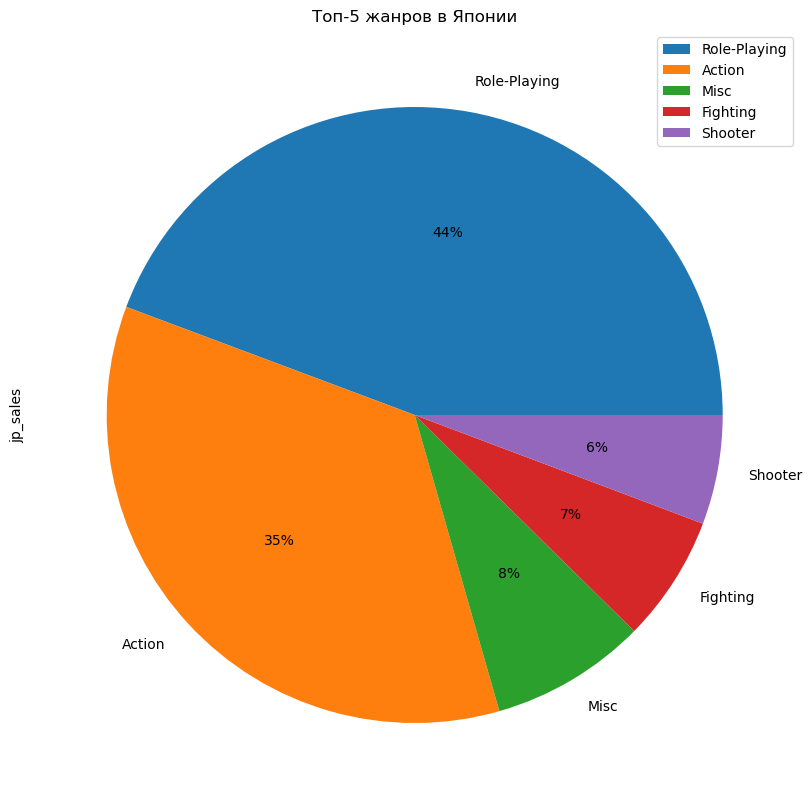

In [116]:
jp_top_genre.plot(y='jp_sales', kind='pie', autopct='%1.0f%%', figsize=(15, 10), title ='Топ-5 жанров в Японии');

В Японии самые популярные жанры, составляющие большую долю всего рынка - Role-Playing и Action(44% и 35% соответственно). Они занимают долю в 79% что очень много. Разница между Европой и Северной Америкой есть, в этих регионах доля игр жанра Role-Playing меньше относительно других. Жанр Action примерно с такой же долей как и у Японии. Возможно вся разница заключается в отличительной особенности культур.

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [117]:
#топ 5 платформ в Северной Америке
na_rating=actual_data.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales',ascending=False)
display(na_rating)

,na_sales
rating,
M,165.29
E,79.05
E10+,54.24
T,49.79


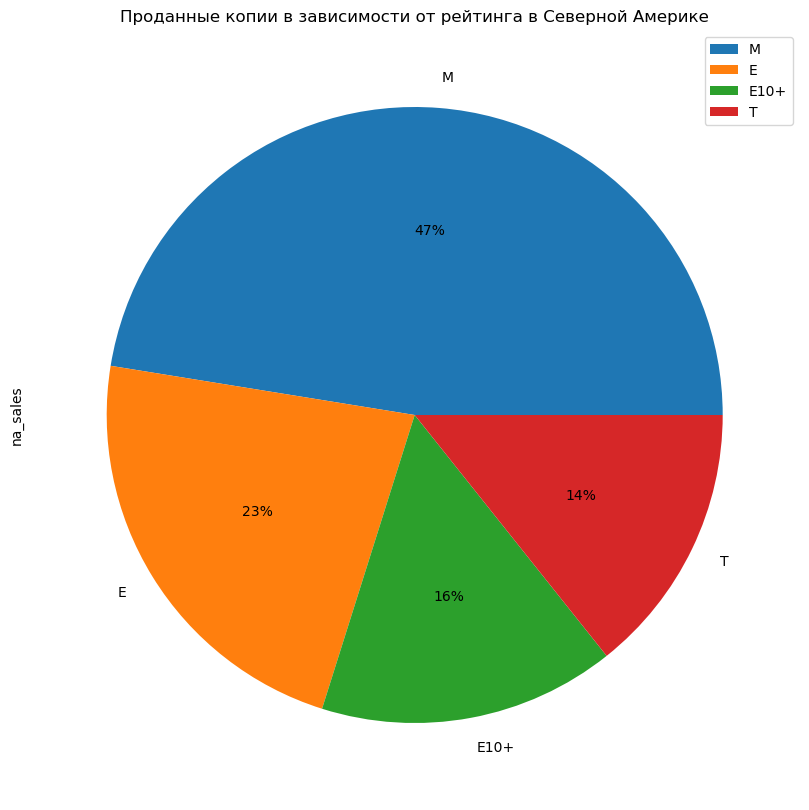

In [118]:
na_rating.plot(y='na_sales', kind='pie', autopct='%1.0f%%', figsize=(15, 10), title ='Проданные копии в зависимости от рейтинга в Северной Америке');

Игра с рейтингом M(17+) более популярны в Северной Америке и их доля составляет чуть меньше половины. Далее идет рейтинг E(все) - 23%. Самая небольшая доля у рейтинга T(подростки) - 14%.

In [119]:
#топ 5 платформ в Северной Америке
eu_rating=actual_data.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales',ascending=False)
display(eu_rating)

,eu_sales
rating,
M,145.80
E,83.36
E10+,42.69
T,41.95


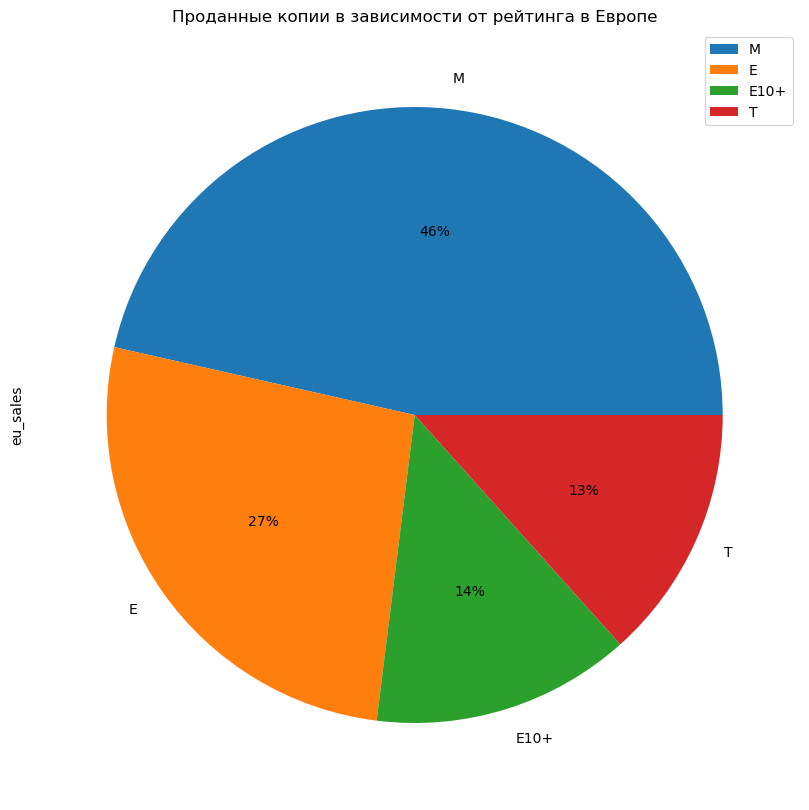

In [120]:
eu_rating.plot(y='eu_sales', kind='pie', autopct='%1.0f%%', figsize=(15, 10), title ='Проданные копии в зависимости от рейтинга в Европе');

Очень похожая диаграмма у пользователей из Европы с пользователями из Северной Америки.

In [121]:
#топ 5 платформ в Северной Америке
jp_rating=actual_data.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales',ascending=False)
display(jp_rating)

,jp_sales
rating,
T,20.59
E,15.14
M,14.11
E10+,5.89


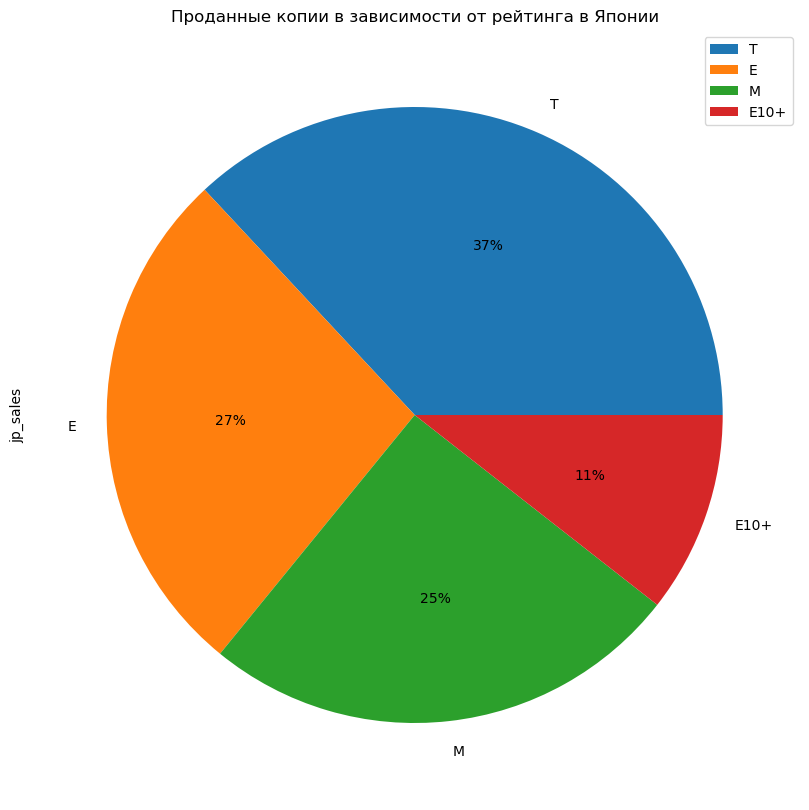

In [122]:
jp_rating.plot(y='jp_sales', kind='pie', autopct='%1.0f%%', figsize=(15, 10), title ='Проданные копии в зависимости от рейтинга в Японии');

Большая доля в Японии для игр с рейтингом T - 37%. Меньше всего у E10+ - 11%. Равные доли у рейтингов E и M - 27% и 25%.

    В Северной Америке пользователи предпочитают платформы PS4, XOne, X360. Любимыми жанрами можно назвать Action и Shooter. И большая часть этих пользователей предпочитает игры с рейтингов 17+.
    В Европе пользователи предпочитают платформы PS4 и PS3. Любимыми жанрами можно назвать так же как и у пользователей с Северной Америки Action и Shooter. И большая часть этих пользователей предпочитает игры с рейтингов также 17+.
    А вот у пользователей из Японии предпочтения немного меняются. Наиболее популярной платформой является 3DS. Любимые жанры Action и Role-Playing. И большая часть этих пользователей предпочитает игры с рейтингов Т в большей степени, E и M чуть меньше.

### Шаг 5. Проверьте гипотезы

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC равны.
Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [123]:

#xone_user = actual_data.query('platform == "XOne"')
#pivot_xone_user = xone_user.pivot_table(index='platform', values='user_score', aggfunc='sum')
#pivot_xone_user = xone_user.groupby('platform')['user_score']
xone_user_score = filtered_data.loc[filtered_data['platform']=="XOne", 'user_score']
display(xone_user_score)

165      7.9
179      5.4
242      6.4
270      6.2
373      4.1
        ... 
16427    6.8
16480    6.0
16513    8.2
16526    6.6
16543    6.7
Name: user_score, Length: 182, dtype: float64

In [124]:
pc_user_score = filtered_data.loc[filtered_data['platform']=="PC", 'user_score']
display(pc_user_score)

458      3.9
1092     7.9
1347     2.2
1433     6.0
1526     5.4
        ... 
16341    8.3
16347    6.8
16393    7.9
16402    1.4
16575    7.6
Name: user_score, Length: 158, dtype: float64

In [125]:
xone_user_score.mean()

6.521428571428572

In [126]:
pc_user_score.mean()

6.280379746835442

In [127]:
alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(xone_user_score, pc_user_score)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.15503167687396294
Не получилось отвергнуть нулевую гипотезу


Уровень статистической значимости меньше значения pvalue поэтому мы не может отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC равны.

#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports равны.
Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports не равны.

In [128]:
action_user_score = filtered_data.loc[filtered_data['genre']=="Action", 'user_score']
display(action_user_score)

16       8.2
23       8.1
42       8.3
149      9.1
165      7.9
        ... 
16480    6.0
16535    8.5
16537    5.1
16543    6.7
16575    7.6
Name: user_score, Length: 392, dtype: float64

In [129]:
sports_user_score = filtered_data.loc[filtered_data['genre']=="Sports", 'user_score']
display(sports_user_score)

77       4.3
94       5.0
126      4.3
143      5.7
264      4.5
        ... 
16030    8.8
16034    6.9
16335    4.5
16402    1.4
16526    6.6
Name: user_score, Length: 160, dtype: float64

In [130]:
action_user_score.mean()

6.8375

In [131]:
sports_user_score.mean()

5.238124999999999

In [132]:
alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(action_user_score, sports_user_score)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 8.11729623919141e-28
Отвергаем нулевую гипотезу


Уровень статистической значимости больше значения pvalue поэтому мы можем отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports равны.

### Общий вывод:

* Выполняя сборный проект выполнили предобработку данных, исследовательский анализ данных, статистический анализ данных.
* Выполняя предобработку привели значения столбцов к одному регистру, заполнили пропущенные значения в столбцах, выполнили поиск дубликатов.
* В процессе выполнения исследовательского анализа: проанализировали, сколько игр выпускалось в разные годы, менялись ли продажи по платформам, если определенный срок жизни новой платформы и сколько лет она приносит прибыль, выявили актуальны период, за который можно взять данные для дальнейшего прогнозирования прибыли на последующий год, выбрали платформы которые лидируют по продажам, выявили что происходит с ними, растут или падают, остройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам, определили какая разница между графиками каждой платформы, посторили диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами, определили зависимость, посмотрели на общее распределение игр по жанрам, нашли самые прибыльные жанры.
* Посмотрели данные по пользователям отдельных регионов, узнали какие предпочтения у пользователей каждого региона. Составили портрет ползователя для каждого региона.
* Высполнили статистический анализ данных: проверили две гипотезы. 
* Что можно сказать по всему проекту в целом. В прогнозе на 2017 год нужно делать упор на новые и популярные платформы, которые могут приносить прибыль в течении нескольких лет. Лучше всего всегда быть теме новинок и продавать то, что будет более популярно у пользователей, как показывает анализ, что платформы быстро могут утратить популярность если выходит какая-то новая платформа. Игры в жанре Action и Shooter более популярны среди пользователей, а также игры жанра Sports. Среди пользователей большую долю занимает рейтинг 17+. Есть разница у пользователей по региону, но она не сказать, что какая-то существенная, но все же есть, видно, что в каждом регионе есть свои определенные показатели, это тоже нужно учитывать при продажах.